In [586]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt
import scipy as sci
import stan_helpers as sh
import importlib as imp
import seaborn.objects as so

In [587]:
serall=pd.read_csv("serotonin_longform.csv")
serall

Unnamed: 0  Batch #  Fly ID   Date  Day Drug Treatment  nTurns     rBias
0              0        1       1  10/31    1            aMW   903.0  0.548780
1              1        1       2  10/31    1            aMW    12.0  0.413669
2              2        1       3  10/31    1            aMW   553.0  0.458333
3              3        1       4  10/31    1            aMW   250.0  0.447405
4              4        1       5  10/31    1            aMW   506.0  0.348515
...          ...      ...     ...    ...  ...            ...     ...       ...
5179        5179        3      92   2/22   17            aMW    -1.0       NaN
5180        5180        3      93   2/22   17            aMW    -1.0       NaN
5181        5181        3      94   2/22   17            aMW   222.0  0.271493
5182        5182        3      95   2/22   17            aMW    -1.0       NaN
5183        5183        3      96   2/22   17            aMW    -1.0       NaN

[5184 rows x 8 columns]

In [588]:
a=pd.Series([0, 'test', 1, 50, 120], index=["uID", "PopID", "Day", "x", "nTurns"])
b=a

In [589]:
a.T

uID          0
PopID     test
Day          1
x           50
nTurns     120
dtype: object

In [590]:
pd.concat([a], axis=1).T

uID PopID Day   x nTurns
0   0  test   1  50    120

In [591]:
np.random.binomial(0,.5)

0

In [592]:
x=np.linspace(0,1000,1001)

''

In [593]:
np.random.rand()>.9

False

In [594]:
sci.stats.norm.pdf(x, 240, 300)

array([9.65638509e-04, 9.68211603e-04, 9.70780766e-04, ...,
       5.46400608e-05, 5.41815015e-05, 5.37261937e-05])

In [595]:
max(0, int(sci.stats.beta.rvs( 2, 3)*1200)-100)

170

In [596]:
# plt.plot(sci.stats.beta.pdf(x/1000, 2, 3)a*1000)


uID          0
PopID     test
Day          1
x           50
nTurns     120
dtype: object

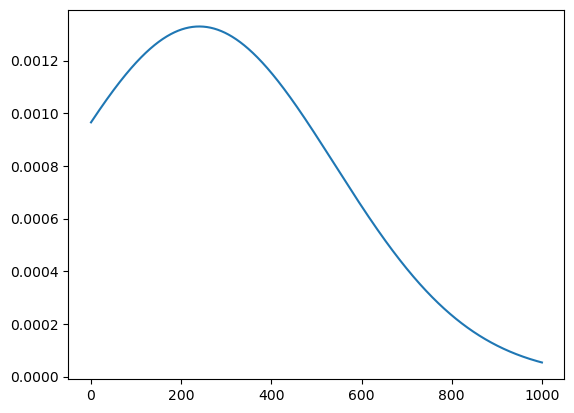

In [597]:
plt.plot(sci.stats.norm.pdf(x, 240, 300))
a

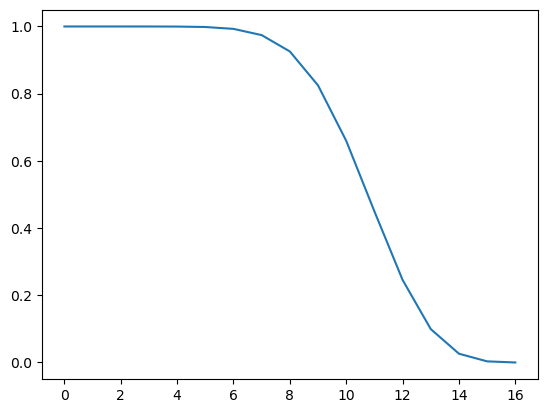

In [598]:
plt.plot(1-sci.stats.binom.cdf(np.linspace(0,16,17), 16, .7))


<Axes: xlabel='nTurns', ylabel='Count'>

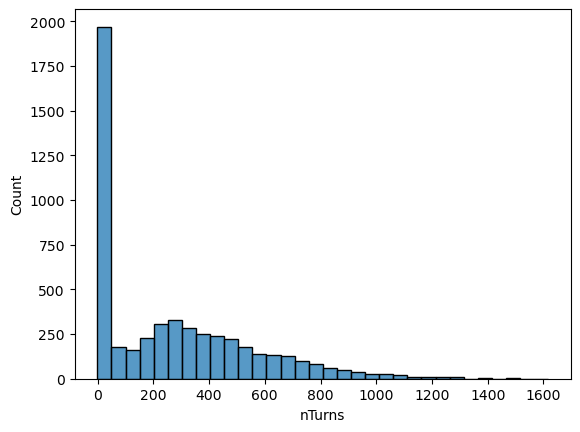

In [599]:
sns.histplot(serall["nTurns"])

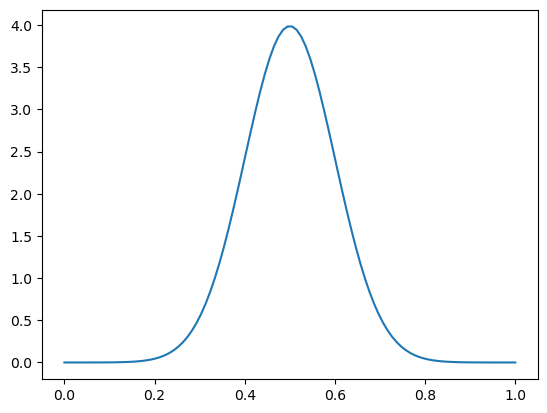

In [600]:
x=np.linspace(0,1,100)
plt.plot(x, sci.stats.norm.pdf(x,.5, .1))

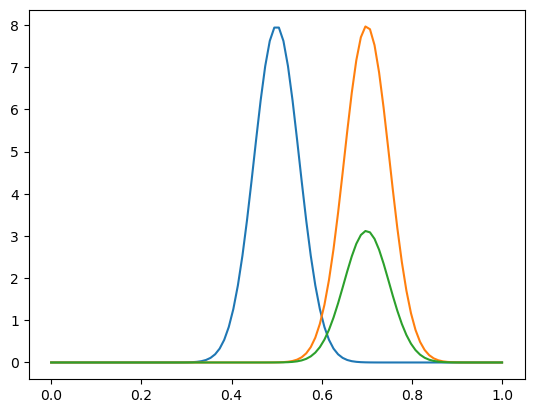

In [601]:

plt.plot(x, sci.stats.norm.pdf(x,.5, .05))
plt.plot(x, sci.stats.norm.pdf(x,.7, .05))
plt.plot(x, (sci.stats.norm.pdf(x,.5, 1)*sci.stats.norm.pdf(x,.7, .05)))

In [602]:
n=10000
x=np.linspace(0,1,n)
a=sci.stats.norm.pdf(x,.5, .1)*sci.stats.norm.pdf(x,.7, .01)
a=a/sum(a)
ac=a.cumsum()
np.searchsorted(ac, np.random.random())/n

0.6979

In [603]:
imp.reload(sh)


<module 'stan_helpers' from '/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py'>

In [604]:
np.random.random()

0.3243523559058329

In [605]:
np.searchsorted(ac, np.random.random())/10000

0.7042

In [606]:
np.searchsorted(ac, .1)

6852

In [607]:
np.random.binomial(100, .5)

50

In [608]:
imp.reload(sh)


<module 'stan_helpers' from '/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py'>

In [609]:
r=min(max(np.random.normal(.5, .1), 0),1)

r

0.5429675040313607

/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py:133: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testtable["Day"]=np.array(testtable["Day"], dtype=int)


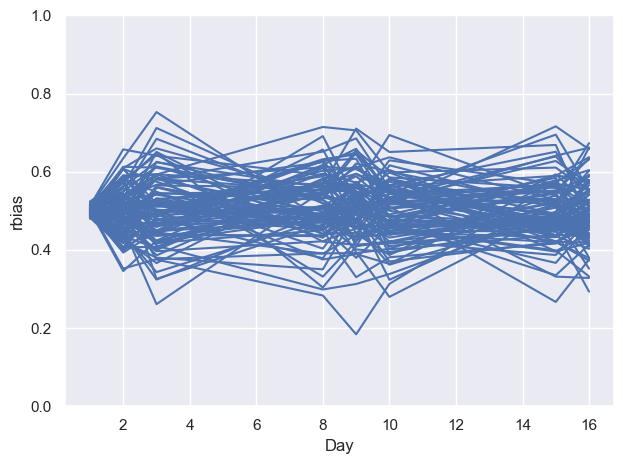

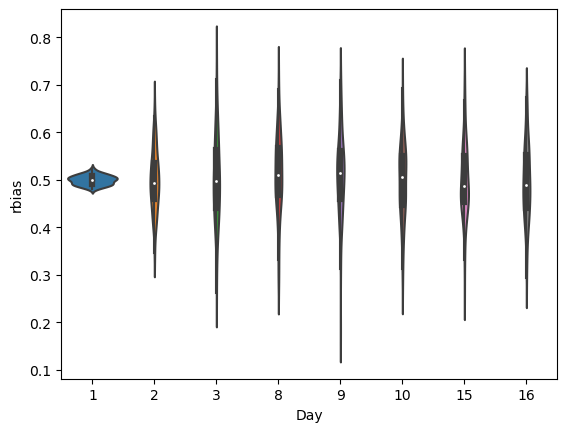

In [610]:
imp.reload(sh)
Test=sh.toydatagenerator(bh=0.01, drift=.1, bound=.1)

/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py:133: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testtable["Day"]=np.array(testtable["Day"], dtype=int)


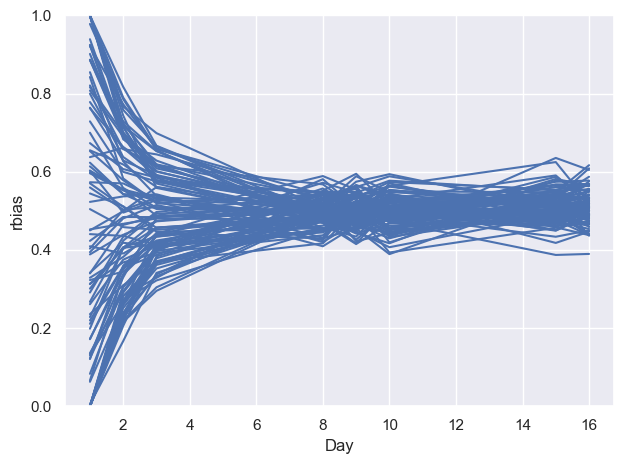

uID       PopID  Day    x nTurns     rbias
0     0  converging    1  778    915  0.854884
1     0  converging    2  186    301  0.626700
2     0  converging    3  244    476  0.537900
3     0  converging    8  234    569  0.420100
4     0  converging    9   44    114  0.472200
..   ..         ...  ...  ...    ...       ...
795  99  converging    8   40     86  0.480100
796  99  converging    9  112    260  0.442000
797  99  converging   10  NaN      0  0.468300
798  99  converging   15  159    327  0.512400
799  99  converging   16   61     98  0.575500

[800 rows x 6 columns]

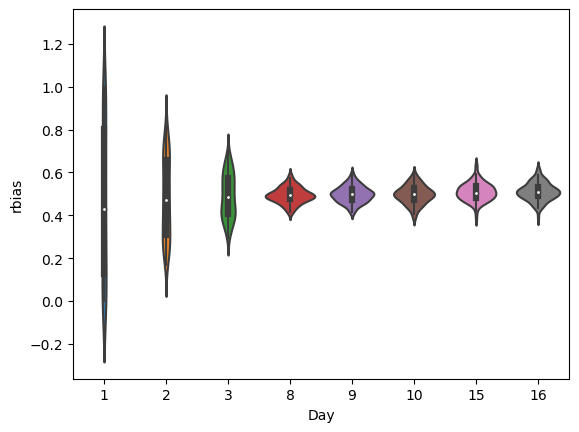

In [611]:
imp.reload(sh)
converging=sh.toydatagenerator('converging', nflies=100, bh=.4, drift=.05, bound=.05)
converging

/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py:133: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testtable["Day"]=np.array(testtable["Day"], dtype=int)


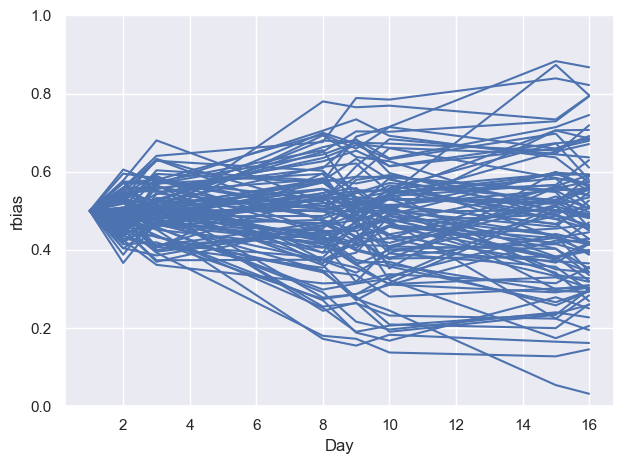

uID      PopID  Day    x nTurns     rbias
0     0  expanding    1  290    560  0.500607
1     0  expanding    2  167    291  0.574000
2     0  expanding    3  126    213  0.579200
3     0  expanding    8  140    210  0.695800
4     0  expanding    9  247    365  0.659400
..   ..        ...  ...  ...    ...       ...
795  99  expanding    8   13     21  0.405600
796  99  expanding    9  177    407  0.428500
797  99  expanding   10  276    596  0.463900
798  99  expanding   15  117    256  0.430100
799  99  expanding   16  107    283  0.394800

[800 rows x 6 columns]

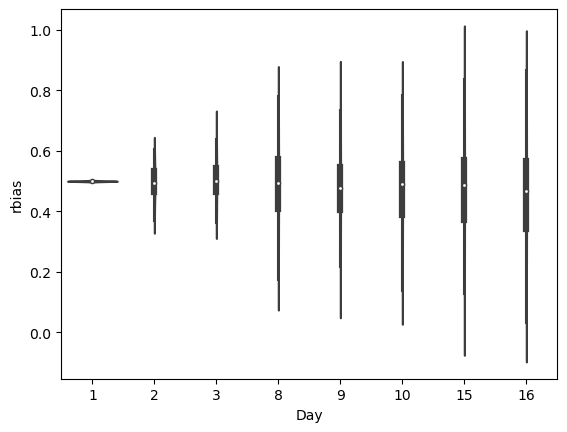

In [612]:
expanding=sh.toydatagenerator('expanding', nflies=100, bh=.001, drift=.05, bound=.3)
expanding

/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py:133: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testtable["Day"]=np.array(testtable["Day"], dtype=int)


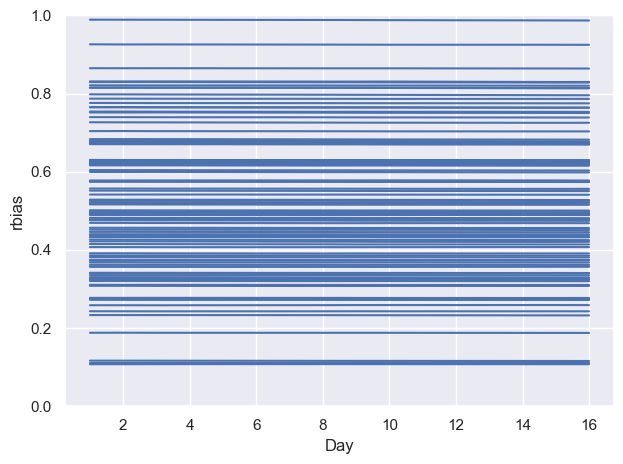

uID    PopID  Day    x nTurns     rbias
0     0  nodrift    1  360    621  0.574858
1     0  nodrift    2  158    260  0.574900
2     0  nodrift    3  313    566  0.574800
3     0  nodrift    8  NaN      0  0.574600
4     0  nodrift    9  NaN      0  0.574300
..   ..      ...  ...  ...    ...       ...
795  99  nodrift    8  NaN      0  0.468500
796  99  nodrift    9  NaN      0  0.468500
797  99  nodrift   10  NaN      0  0.468600
798  99  nodrift   15  NaN      0  0.468600
799  99  nodrift   16  NaN      0  0.468500

[800 rows x 6 columns]

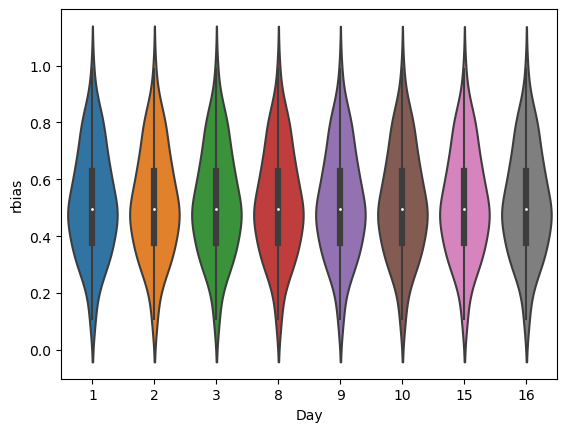

In [613]:
nodrift=sh.toydatagenerator('nodrift', nflies=100, bh=.2, drift=0.0001, bound=.3)
nodrift

/Users/ryanmaloney/Documents/GitHub/DGRP experiments/stan_helpers.py:133: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testtable["Day"]=np.array(testtable["Day"], dtype=int)


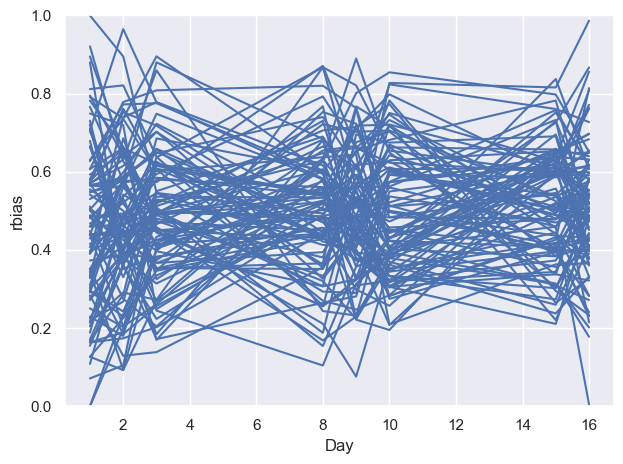

uID             PopID  Day    x nTurns     rbias
0     0  constantvariance    1  212    621  0.344359
1     0  constantvariance    2   30    207  0.093000
2     0  constantvariance    3  107    370  0.270800
3     0  constantvariance    8  300    464  0.634600
4     0  constantvariance    9  502    573  0.889900
..   ..               ...  ...  ...    ...       ...
795  99  constantvariance    8   27    112  0.320400
796  99  constantvariance    9  201    915  0.223300
797  99  constantvariance   10   64    167  0.363800
798  99  constantvariance   15  623    896  0.695700
799  99  constantvariance   16  409    818  0.472600

[800 rows x 6 columns]

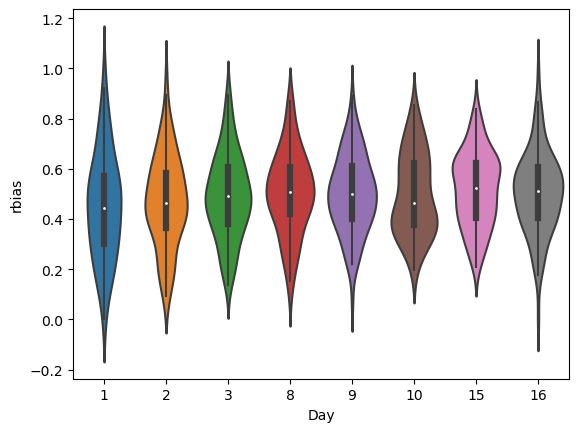

In [614]:
constantvariance=sh.toydatagenerator('constantvariance', nflies=100, bh=.2, drift=.2, bound=.2)
constantvariance

In [615]:
alltoydata=pd.concat([constantvariance, nodrift, converging, expanding])
alltoydata

uID             PopID  Day    x nTurns     rbias
0     0  constantvariance    1  212    621  0.344359
1     0  constantvariance    2   30    207  0.093000
2     0  constantvariance    3  107    370  0.270800
3     0  constantvariance    8  300    464  0.634600
4     0  constantvariance    9  502    573  0.889900
..   ..               ...  ...  ...    ...       ...
795  99         expanding    8   13     21  0.405600
796  99         expanding    9  177    407  0.428500
797  99         expanding   10  276    596  0.463900
798  99         expanding   15  117    256  0.430100
799  99         expanding   16  107    283  0.394800

[3200 rows x 6 columns]

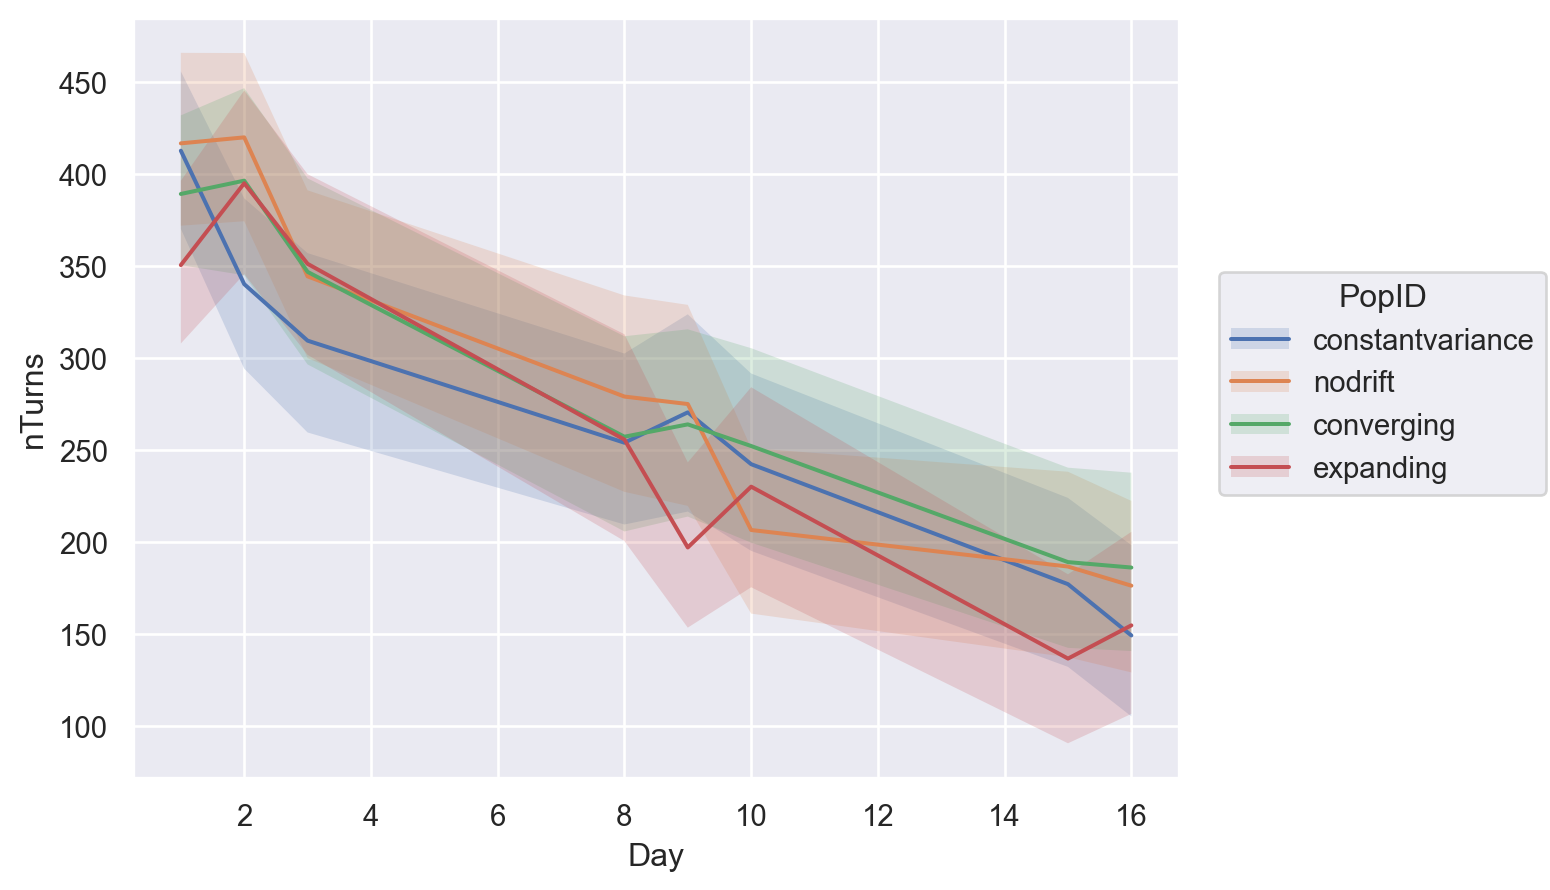

In [616]:
so.Plot(data=alltoydata, x="Day", y="nTurns", color="PopID").add(so.Line(), so.Agg()).add(so.Band(), so.Est())

In [617]:

# # testtable=sh.toydatagenerator('converging', nflies=100, bh=.4, drift=.1, bound=.01)
# p=so.Plot(data=testtable, x="Day", y="rbias", group="uID").add(so.Line()).limit(y=(0,1))
# # p.get_legend().remove()
# # p.label(color=False)
# p

In [618]:
alltoydata["uID"]=np.array(alltoydata["uID"], dtype=int)
pd.Categorical(alltoydata.drop_duplicates(subset="uID").sort_values("uID")["PopID"]).codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [619]:
alltoydata["uID"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [620]:
pd.Categorical(alltoydata.drop_duplicates(subset="uID").sort_values("uID")["PopID"])

['constantvariance', 'constantvariance', 'constantvariance', 'constantvariance', 'constantvariance', ..., 'constantvariance', 'constantvariance', 'constantvariance', 'constantvariance', 'constantvariance']
Length: 100
Categories (1, object): ['constantvariance']

In [621]:
alltoydata

uID             PopID  Day    x nTurns     rbias
0      0  constantvariance    1  212    621  0.344359
1      0  constantvariance    2   30    207  0.093000
2      0  constantvariance    3  107    370  0.270800
3      0  constantvariance    8  300    464  0.634600
4      0  constantvariance    9  502    573  0.889900
..   ...               ...  ...  ...    ...       ...
795   99         expanding    8   13     21  0.405600
796   99         expanding    9  177    407  0.428500
797   99         expanding   10  276    596  0.463900
798   99         expanding   15  117    256  0.430100
799   99         expanding   16  107    283  0.394800

[3200 rows x 6 columns]

In [622]:
alltoydata["uID"]=pd.Categorical(alltoydata["uID"].astype(str)+alltoydata["PopID"]).codes
alltoydata

uID             PopID  Day    x nTurns     rbias
0      0  constantvariance    1  212    621  0.344359
1      0  constantvariance    2   30    207  0.093000
2      0  constantvariance    3  107    370  0.270800
3      0  constantvariance    8  300    464  0.634600
4      0  constantvariance    9  502    573  0.889900
..   ...               ...  ...  ...    ...       ...
795  394         expanding    8   13     21  0.405600
796  394         expanding    9  177    407  0.428500
797  394         expanding   10  276    596  0.463900
798  394         expanding   15  117    256  0.430100
799  394         expanding   16  107    283  0.394800

[3200 rows x 6 columns]

In [623]:
alltoydata.drop_duplicates(subset="uID").sort_values("uID")

uID             PopID  Day    x nTurns     rbias
0      0  constantvariance    1  212    621  0.344359
0      1        converging    1  778    915  0.854884
0      2         expanding    1  290    560  0.500607
0      3           nodrift    1  360    621  0.574858
80     4  constantvariance    1  348    553  0.627479
..   ...               ...  ...  ...    ...       ...
792  395           nodrift    1   93    221  0.469317
72   396  constantvariance    1   66    571  0.108339
72   397        converging    1  194    428  0.450050
72   398         expanding    1  424    849  0.500636
72   399           nodrift    1  299    563  0.526533

[400 rows x 6 columns]

In [624]:
alltoydata.shape

(3200, 6)

In [625]:
np.where(alltoydata["nTurns"]==0, np.nan, alltoydata["nTurns"]).shape

(3200,)

In [626]:
alltoydata["rguess"]=np.abs(alltoydata["x"]/np.where(alltoydata["nTurns"]==0, np.nan, alltoydata["nTurns"])-.5)
# alltoydata[""]

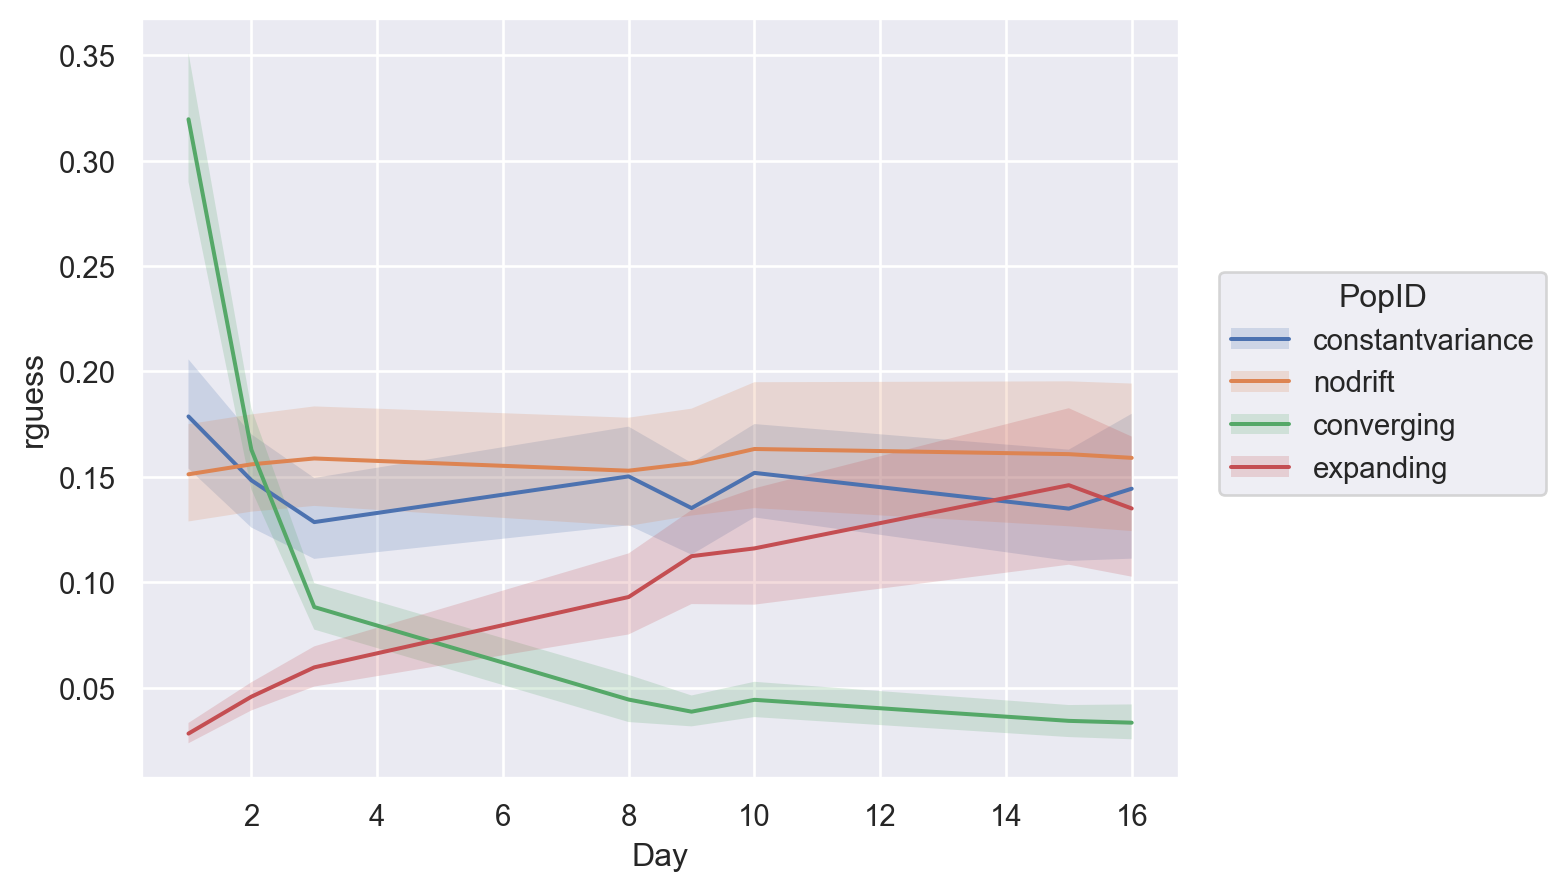

In [627]:
so.Plot(data=alltoydata, x="Day", y="rguess", color="PopID").add(so.Line(), so.Agg()).add(so.Band(), so.Est())

In [628]:
datatable_u=alltoydata.drop_duplicates(subset="uID").sort_values("uID")
datatable_u

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.158615
0      1        converging    1  778    915  0.854884  0.350273
0      2         expanding    1  290    560  0.500607  0.017857
0      3           nodrift    1  360    621  0.574858   0.07971
80     4  constantvariance    1  348    553  0.627479  0.129295
..   ...               ...  ...  ...    ...       ...       ...
792  395           nodrift    1   93    221  0.469317  0.079186
72   396  constantvariance    1   66    571  0.108339  0.384413
72   397        converging    1  194    428  0.450050  0.046729
72   398         expanding    1  424    849  0.500636  0.000589
72   399           nodrift    1  299    563  0.526533  0.031083

[400 rows x 7 columns]

In [629]:
alltoydata

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.158615
1      0  constantvariance    2   30    207  0.093000  0.355072
2      0  constantvariance    3  107    370  0.270800  0.210811
3      0  constantvariance    8  300    464  0.634600  0.146552
4      0  constantvariance    9  502    573  0.889900  0.376091
..   ...               ...  ...  ...    ...       ...       ...
795  394         expanding    8   13     21  0.405600  0.119048
796  394         expanding    9  177    407  0.428500  0.065111
797  394         expanding   10  276    596  0.463900  0.036913
798  394         expanding   15  117    256  0.430100  0.042969
799  394         expanding   16  107    283  0.394800  0.121908

[3200 rows x 7 columns]

In [630]:
alltoydata["uID"]=pd.Categorical(pd.Series(alltoydata["uID"], dtype=str)+alltoydata["PopID"]).codes
alltoydata

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.158615
1      0  constantvariance    2   30    207  0.093000  0.355072
2      0  constantvariance    3  107    370  0.270800  0.210811
3      0  constantvariance    8  300    464  0.634600  0.146552
4      0  constantvariance    9  502    573  0.889900  0.376091
..   ...               ...  ...  ...    ...       ...       ...
795  326         expanding    8   13     21  0.405600  0.119048
796  326         expanding    9  177    407  0.428500  0.065111
797  326         expanding   10  276    596  0.463900  0.036913
798  326         expanding   15  117    256  0.430100  0.042969
799  326         expanding   16  107    283  0.394800  0.121908

[3200 rows x 7 columns]

In [631]:
datatable=alltoydata.sort_values(["uID", "Day"])
poplabel="PopID"

In [632]:
alltoydata.sort_values(["uID", "Day"])

uID             PopID  Day    x nTurns     rbias    rguess
0     0  constantvariance    1  212    621  0.344359  0.158615
1     0  constantvariance    2   30    207  0.093000  0.355072
2     0  constantvariance    3  107    370  0.270800  0.210811
3     0  constantvariance    8  300    464  0.634600  0.146552
4     0  constantvariance    9  502    573  0.889900  0.376091
..  ...               ...  ...  ...    ...       ...       ...
91  399        converging    8  NaN      0  0.462200       NaN
92  399        converging    9  NaN      0  0.492200       NaN
93  399        converging   10  NaN      0  0.512300       NaN
94  399        converging   15  NaN      0  0.547700       NaN
95  399        converging   16  NaN      0  0.518300       NaN

[3200 rows x 7 columns]

In [633]:
datatable["uID"]=np.array(datatable["uID"], dtype=int)

# datatable
datatable_mis=datatable[datatable.isna().any(axis=1)]
datatable_obs=datatable.dropna()

dummyrow=datatable_mis.iloc[0,:]

actualdays=np.unique(datatable_mis["Day"])
fullrange=np.arange(0,np.max(actualdays), dtype=float)

missingdays=np.array(pd.Series(fullrange).dropna(), dtype=int)

for ii, i in enumerate(actualdays):
  for jj, j in enumerate(fullrange):
    if j==i:
      # print(j)
      # print(i)
      fullrange[jj]=np.nan

# np.unique(datatable_obs["Day"])
for i in range(datatable["uID"].unique().shape[0]):
  dummyrownew=dummyrow.copy()
  dummyrownew.loc['uID']=int(i)
  for j in missingdays:
    dummyrownew.loc['Day']=int(j)
    datatable_mis=pd.concat([datatable_mis, pd.DataFrame(dummyrownew).T])
    # skt_unmelted_mis_b.append(dummyrow)

datatable_u=datatable.drop_duplicates(subset="uID").sort_values("uID")
datatable_us=datatable.drop_duplicates(subset="uID")

datadict={
  "N": datatable["uID"].unique().shape[0], # skt.shape[0], #Total number of flies
  "S": datatable[poplabel].unique().shape[0], #Total number of Lines

  "T": int(datatable["Day"].max()+1), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(datatable_u[poplabel]).codes+1, # list of line number per fly
  "fly_i_obs": datatable_obs["uID"]+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(datatable_obs["Day"], dtype=int), # indexes of fly number for flattened observations
  "t_obs": datatable_obs['nTurns'].shape[0], # total number of observed trials
  "x_obs": np.array(datatable_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(datatable_obs['nTurns']+1, dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(datatable_mis["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(datatable_mis["Day"], dtype=int)+1, # indexes of day number for flattened observations
  "t_mis": datatable_mis['nTurns'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}

In [634]:
foo=np.array(datatable_obs["x"])/np.array(datatable_obs["nTurns"])
foo.shape
datatable_obs["rguess"]=pd.Series(foo)
# pd.concat([datatable_obs.reset_index(), pd.Series(foo)], axis=1)

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_53208/263438029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatable_obs["rguess"]=pd.Series(foo)


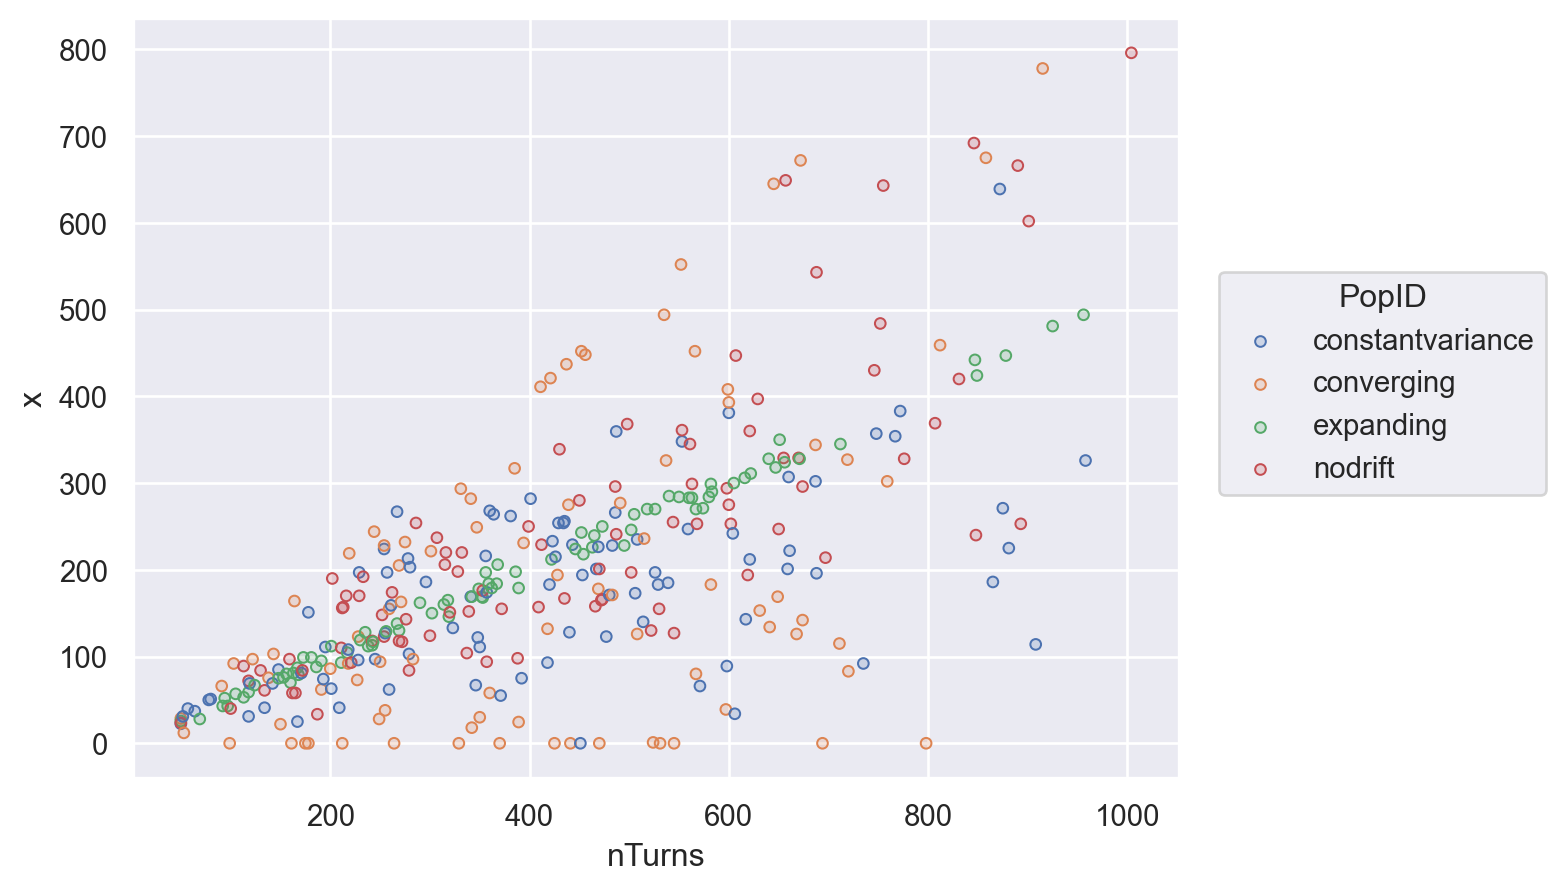

In [635]:
so.Plot(data=datatable_u, x="nTurns", y="x", color="PopID").add(so.Dots(), so.Agg())

In [636]:
datadict["x_obs"]/(datadict["n_obs"]-1)


array([0.34138486, 0.14492754, 0.28918919, ..., 0.7706422 , 0.06532663,
       0.33687943])

In [637]:
datatable_obs.drop_duplicates("uID")

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
256    1  constantvariance    1  262    381  0.665254   0.55625
256    2        converging    1    0    178  0.000000   0.55625
256    3         expanding    1  113    242  0.499355   0.55625
256    4           nodrift    1  339    430  0.765496   0.55625
..   ...               ...  ...  ...    ...       ...       ...
248  395  constantvariance    1   34    606  0.071274  0.788694
248  396        converging    1  277    331  0.821029  0.788694
248  397         expanding    1   27     50  0.500546  0.788694
248  398           nodrift    1  543    688  0.787189  0.788694
88   399        converging    1   39    597  0.065920  0.422559

[400 rows x 7 columns]

In [638]:
datadict

{'N': 400,
 'S': 4,
 'T': 17,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [639]:
alltoydata["nTurns"][alltoydata["nTurns"]==0]=np.nan

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_53208/4261956538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alltoydata["nTurns"][alltoydata["nTurns"]==0]=np.nan


In [640]:
alltoydata["rguess"]=alltoydata["x"]/alltoydata["nTurns"]

In [641]:
alltoydata

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
795  326         expanding    8   13     21  0.405600  0.619048
796  326         expanding    9  177    407  0.428500  0.434889
797  326         expanding   10  276    596  0.463900  0.463087
798  326         expanding   15  117    256  0.430100  0.457031
799  326         expanding   16  107    283  0.394800  0.378092

[3200 rows x 7 columns]

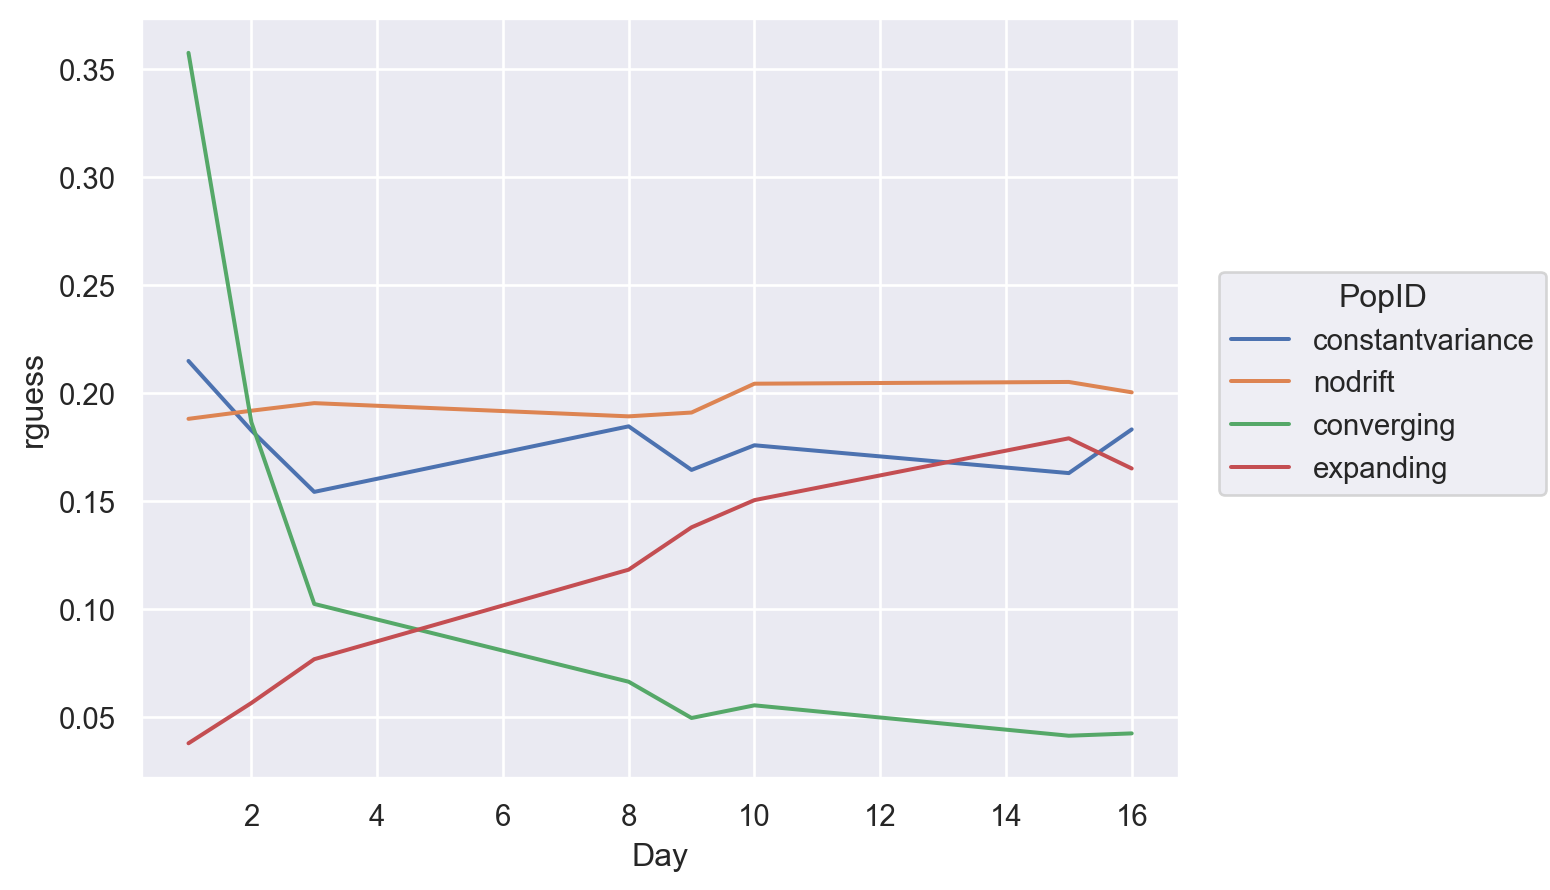

In [642]:
so.Plot(data=alltoydata.dropna(), x="Day", y="rguess", color="PopID").add(so.Line(), so.Agg(np.std))

In [643]:
atd_nona=alltoydata.dropna()
atd_nona

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
795  326         expanding    8   13     21  0.405600  0.619048
796  326         expanding    9  177    407  0.428500  0.434889
797  326         expanding   10  276    596  0.463900  0.463087
798  326         expanding   15  117    256  0.430100  0.457031
799  326         expanding   16  107    283  0.394800  0.378092

[2210 rows x 7 columns]

In [644]:
datatable_obs.sort_values('uID')

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
249  398           nodrift    2  114    144  0.787200  0.823389
248  398           nodrift    1  543    688  0.787189  0.788694
250  398           nodrift    3   84    109  0.787000  0.840909
88   399        converging    1   39    597  0.065920  0.422559
89   399        converging    2  190    564  0.337200  0.417085

[2210 rows x 7 columns]

In [645]:
datatable_u

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.158615
256    1  constantvariance    1  262    381  0.665254  0.187664
256    2        converging    1    0    178  0.000000       0.5
256    3         expanding    1  113    242  0.499355  0.033058
256    4           nodrift    1  339    430  0.765496  0.288372
..   ...               ...  ...  ...    ...       ...       ...
248  395  constantvariance    1   34    606  0.071274  0.443894
248  396        converging    1  277    331  0.821029  0.336858
248  397         expanding    1   27     50  0.500546      0.04
248  398           nodrift    1  543    688  0.787189  0.289244
88   399        converging    1   39    597  0.065920  0.434673

[400 rows x 7 columns]

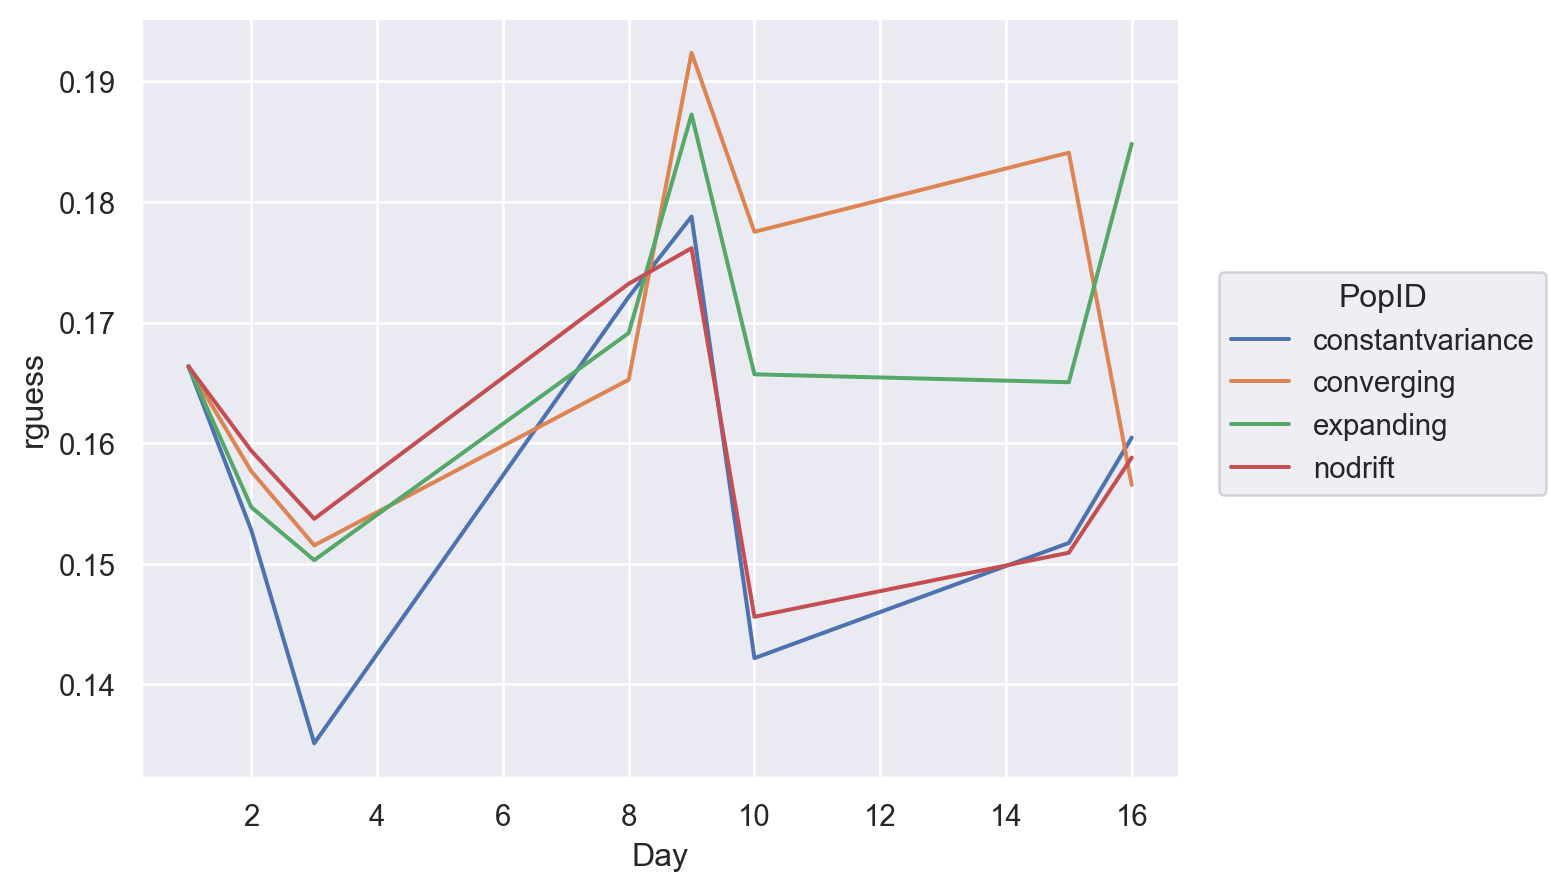

In [646]:
so.Plot(data=datatable_obs, x="Day", y="rguess", color="PopID").add(so.Line(), so.Agg(np.std))

In [647]:
alltoydata

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
795  326         expanding    8   13     21  0.405600  0.619048
796  326         expanding    9  177    407  0.428500  0.434889
797  326         expanding   10  276    596  0.463900  0.463087
798  326         expanding   15  117    256  0.430100  0.457031
799  326         expanding   16  107    283  0.394800  0.378092

[3200 rows x 7 columns]

In [648]:
alltoydata.pivot(columns="Day", index=["uID", "PopID", "x", "nTurns", "rbias", "rguess"])

Empty DataFrame
Columns: []
Index: [(0, constantvariance, 30.0, 207.0, 0.093, 0.14492753623188406), (0, constantvariance, 55.0, 163.0, 0.3374, 0.3374233128834356), (0, constantvariance, 107.0, 370.0, 0.2708, 0.2891891891891892), (0, constantvariance, 207.0, 315.0, 0.6494, 0.6571428571428571), (0, constantvariance, 212.0, 621.0, 0.34435850580376154, 0.3413848631239936), (0, constantvariance, 300.0, 464.0, 0.6346, 0.646551724137931), (0, constantvariance, 302.0, 497.0, 0.5829, 0.607645875251509), (0, constantvariance, 502.0, 573.0, 0.8899, 0.8760907504363001), (1, constantvariance, 25.0, 59.0, 0.4123, 0.423728813559322), (1, constantvariance, 45.0, 261.0, 0.1843, 0.1724137931034483), (1, constantvariance, 110.0, 220.0, 0.4971, 0.5), (1, constantvariance, 179.0, 284.0, 0.5833, 0.6302816901408451), (1, constantvariance, 219.0, 507.0, 0.4023, 0.4319526627218935), (1, constantvariance, 232.0, 597.0, 0.4206, 0.38860971524288107), (1, constantvariance, 262.0, 381.0, 0.6652539690142117, 0.6876640419947506), (1, constantvariance, 264.0, 413.0, 0.6808, 0.639225181598063), (2, converging, nan, nan, 0.6047, nan), (2, converging, nan, nan, 0.6355, nan), (2, converging, 0.0, 178.0, 0.0, 0.0), (2, converging, 58.0, 180.0, 0.366, 0.32222222222222224), (2, converging, 62.0, 114.0, 0.4907, 0.543859649122807), (2, converging, 102.0, 217.0, 0.4829, 0.4700460829493088), (2, converging, 142.0, 316.0, 0.4496, 0.44936708860759494), (2, converging, 194.0, 736.0, 0.2646, 0.26358695652173914), (3, expanding, nan, nan, 0.2806, nan), (3, expanding, nan, nan, 0.3015, nan), (3, expanding, nan, nan, 0.3032, nan), (3, expanding, nan, nan, 0.3355, nan), (3, expanding, nan, nan, 0.3464, nan), (3, expanding, 111.0, 238.0, 0.492, 0.46638655462184875), (3, expanding, 113.0, 242.0, 0.4993552053621928, 0.4669421487603306), (3, expanding, 171.0, 379.0, 0.4327, 0.45118733509234826), (4, nodrift, nan, nan, 0.7642, nan), (4, nodrift, nan, nan, 0.7649, nan), (4, nodrift, nan, nan, 0.765, nan), (4, nodrift, nan, nan, 0.7651, nan), (4, nodrift, 252.0, 330.0, 0.7655, 0.7636363636363637), (4, nodrift, 339.0, 430.0, 0.7654956251442485, 0.7883720930232558), (4, nodrift, 419.0, 553.0, 0.7654, 0.7576853526220615), (5, constantvariance, 6.0, 8.0, 0.4712, 0.75), (5, constantvariance, 83.0, 205.0, 0.3792, 0.40487804878048783), (5, constantvariance, 116.0, 537.0, 0.2017, 0.21601489757914338), (5, constantvariance, 141.0, 244.0, 0.5795, 0.5778688524590164), (5, constantvariance, 174.0, 357.0, 0.5302165432317828, 0.48739495798319327), (5, constantvariance, 236.0, 690.0, 0.3727, 0.34202898550724636), (5, constantvariance, 257.0, 385.0, 0.6589, 0.6675324675324675), (5, constantvariance, 304.0, 948.0, 0.3128, 0.3206751054852321), (6, converging, nan, nan, 0.4841, nan), (6, converging, nan, nan, 0.5276, nan), (6, converging, 81.0, 160.0, 0.4824, 0.50625), (6, converging, 135.0, 208.0, 0.6653, 0.6490384615384616), (6, converging, 205.0, 470.0, 0.4698, 0.43617021276595747), (6, converging, 223.0, 414.0, 0.5376, 0.538647342995169), (6, converging, 421.0, 421.0, 1.0, 1.0), (6, converging, 494.0, 651.0, 0.7584, 0.7588325652841782), (7, expanding, nan, nan, 0.3435, nan), (7, expanding, nan, nan, 0.3748, nan), (7, expanding, nan, nan, 0.5, nan), (7, expanding, 21.0, 47.0, 0.4795, 0.44680851063829785), (7, expanding, 145.0, 312.0, 0.4704, 0.46474358974358976), (7, expanding, 233.0, 542.0, 0.4362, 0.42988929889298894), (7, expanding, 244.0, 537.0, 0.4556, 0.4543761638733706), (7, expanding, 270.0, 518.0, 0.49986877063632146, 0.5212355212355212), (8, nodrift, nan, nan, 0.7254, nan), (8, nodrift, nan, nan, 0.7255, nan), (8, nodrift, nan, nan, 0.7257, nan), (8, nodrift, nan, nan, 0.7258, nan), (8, nodrift, nan, nan, 0.7259, nan), (8, nodrift, nan, nan, 0.7265, nan), (8, nodrift, 157.0, 213.0, 0.7267750069896303, 0.7370892018779343), (8, nodrift, 280.0, 403.0, 0.7266, 0.6947890818858561), (9, constantvariance, nan, nan, 0.4334, nan), (9, constantvariance, nan, nan, 0.5051, nan), (9, constantvariance, n

In [649]:
imp.reload(sh)
dd, dt_obs=sh.populateStanDictionary(alltoydata, poplabel="PopID", nturnadjustment=0, timeiadjustment=0)
dd

{'N': 400,
 'S': 4,
 'T': 17,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [776]:
dddf=pd.DataFrame({"fly_i_obs":dd['fly_i_obs'], "time_i_obs":dd['time_i_obs'], "x_obs":dd['x_obs'], "n_obs":dd['n_obs']})
dddf["rguess"]=dddf["x_obs"]/dddf["n_obs"]
dddf


fly_i_obs  time_i_obs  x_obs  n_obs    rguess
0             1           1    212    621  0.341385
1             1           2     30    207  0.144928
2             1           3    107    370  0.289189
3             1           8    300    464  0.646552
4             1           9    502    573  0.876091
...         ...         ...    ...    ...       ...
2205        399           1    543    688  0.789244
2206        399           2    114    144  0.791667
2207        399           3     84    109  0.770642
2208        400           1     39    597  0.065327
2209        400           2    190    564  0.336879

[2210 rows x 5 columns]

In [790]:
flys=pd.DataFrame(dd["s"], index=pd.Index(np.arange(1,401), name="fly_i_obs"), columns=["strain"])
flys

strain
fly_i_obs        
1               1
2               1
3               2
4               3
5               4
...           ...
396             1
397             2
398             3
399             4
400             2

[400 rows x 1 columns]

In [792]:
ddfsm=pd.merge(dddf, flys, on="fly_i_obs")
ddfsm

fly_i_obs  time_i_obs  x_obs  n_obs    rguess  strain
0             1           1    212    621  0.341385       1
1             1           2     30    207  0.144928       1
2             1           3    107    370  0.289189       1
3             1           8    300    464  0.646552       1
4             1           9    502    573  0.876091       1
...         ...         ...    ...    ...       ...     ...
2205        399           1    543    688  0.789244       4
2206        399           2    114    144  0.791667       4
2207        399           3     84    109  0.770642       4
2208        400           1     39    597  0.065327       2
2209        400           2    190    564  0.336879       2

[2210 rows x 6 columns]

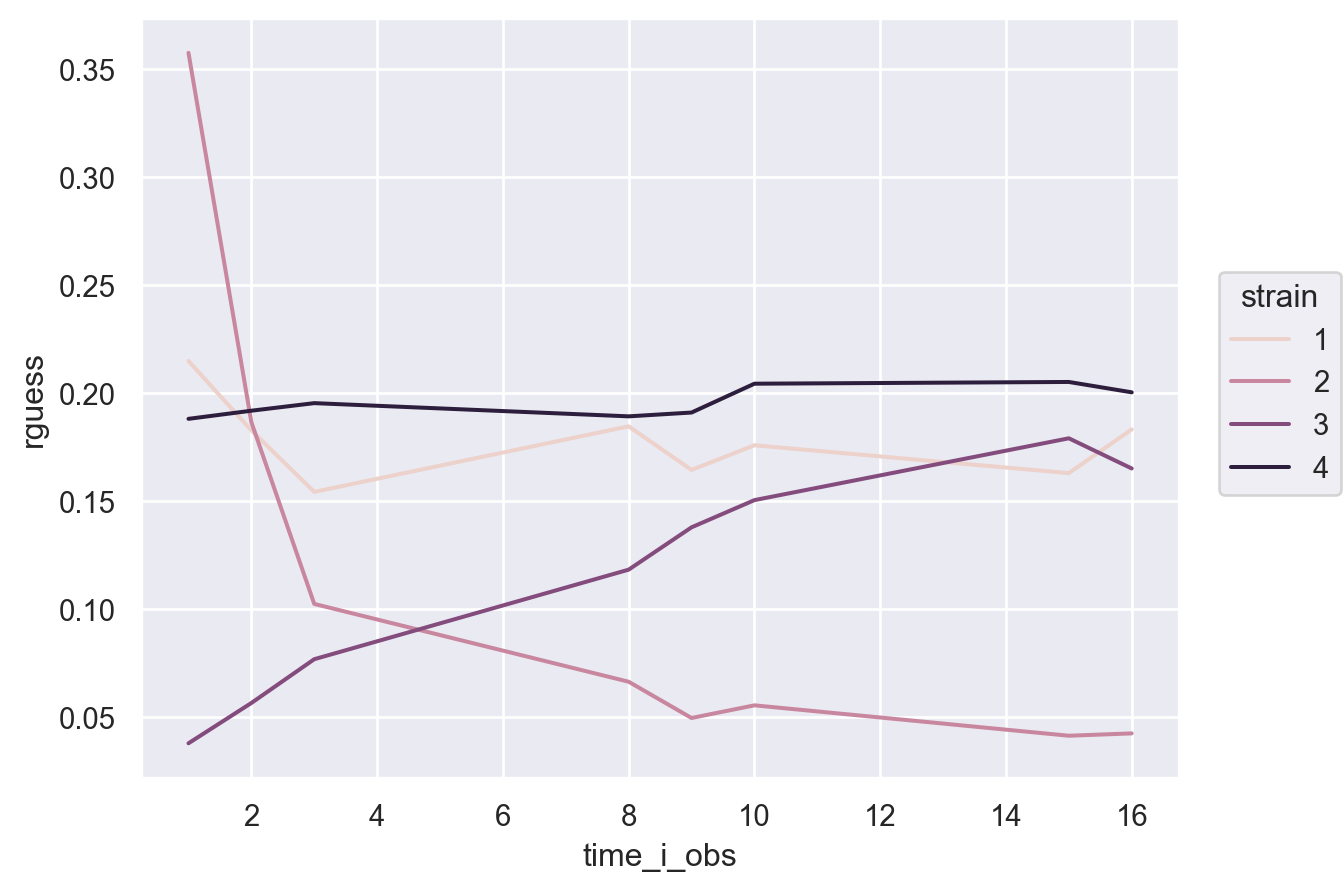

In [796]:
so.Plot(data=ddfsm, x="time_i_obs", y="rguess", color="strain").add(so.Line(), so.Agg(np.std))

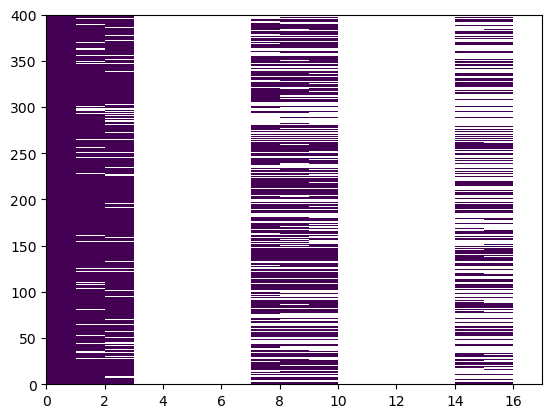

In [650]:
imp.reload(sh)
R=sh.teststandata(dd)
plt.pcolormesh(R)

In [651]:
R[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [652]:
dd["time_i_obs"].min()

1

In [653]:
bloopdd=pd.DataFrame([dd["x_obs"], dd["n_obs"], dd["fly_i_obs"], dd["time_i_obs"]], index=["x_obs", "n_obs", "fly_i_obs", "time_i_obs"]).T
bloopdd

x_obs  n_obs  fly_i_obs  time_i_obs
0       212    621          1           1
1        30    207          1           2
2       107    370          1           3
3       300    464          1           8
4       502    573          1           9
...     ...    ...        ...         ...
2205    543    688        399           1
2206    114    144        399           2
2207     84    109        399           3
2208     39    597        400           1
2209    190    564        400           2

[2210 rows x 4 columns]

In [654]:
bddp=bloopdd.pivot(index="fly_i_obs", columns="time_i_obs")
bddp

x_obs                                                   n_obs  \
time_i_obs     1      2      3      8      9      10     15     16     1    
fly_i_obs                                                                   
1           212.0   30.0  107.0  300.0  502.0  207.0   55.0  302.0  621.0   
2           262.0  219.0   45.0  264.0  232.0  110.0   25.0  179.0  381.0   
3             0.0  194.0   58.0   62.0  102.0  142.0    NaN    NaN  178.0   
4           113.0  111.0  171.0    NaN    NaN    NaN    NaN    NaN  242.0   
5           339.0  252.0  419.0    NaN    NaN    NaN    NaN    NaN  430.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
396          34.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  606.0   
397         277.0  556.0  372.0    NaN  295.0  144.0  235.0  114.0  331.0   
398          27.0  167.0  305.0  238.0   56.0   18.0  127.0  219.0   50.0   
399         543.0  114.0   84.0    NaN    NaN    NaN    NaN    NaN  688.0   
400          39.0  190.0    NaN    NaN    NaN    NaN    NaN    NaN  597.0   

                                                             
time_i_obs     2      3      8      9      10     15     16  
fly_i_obs                                                    
1           207.0  370.0  464.0  573.0  315.0  163.0  497.0  
2           507.0  261.0  413.0  597.0  220.0   59.0  284.0  
3           736.0  180.0  114.0  217.0  316.0    NaN    NaN  
4           238.0  379.0    NaN    NaN    NaN    NaN    NaN  
5           330.0  553.0    NaN    NaN    NaN    NaN    NaN  
...           ...    ...    ...    ...    ...    ...    ...  
396           NaN    NaN    NaN    NaN    NaN    NaN    NaN  
397         845.0  566.0    NaN  544.0  269.0  525.0  241.0  
398         397.0  869.0  780.0  199.0   49.0  423.0  657.0  
399         144.0  109.0    NaN    NaN    NaN    NaN    NaN  
400         564.0    NaN    NaN    NaN    NaN    NaN    NaN  

[400 rows x 16 columns]

In [655]:
bddp["x_obs"][1].dropna()

fly_i_obs
1      212.0
2      262.0
3        0.0
4      113.0
5      339.0
       ...  
396     34.0
397    277.0
398     27.0
399    543.0
400     39.0
Name: 1, Length: 400, dtype: float64

In [656]:
bddp["n_obs"][1]

fly_i_obs
1      621.0
2      381.0
3      178.0
4      242.0
5      430.0
       ...  
396    606.0
397    331.0
398     50.0
399    688.0
400    597.0
Name: 1, Length: 400, dtype: float64

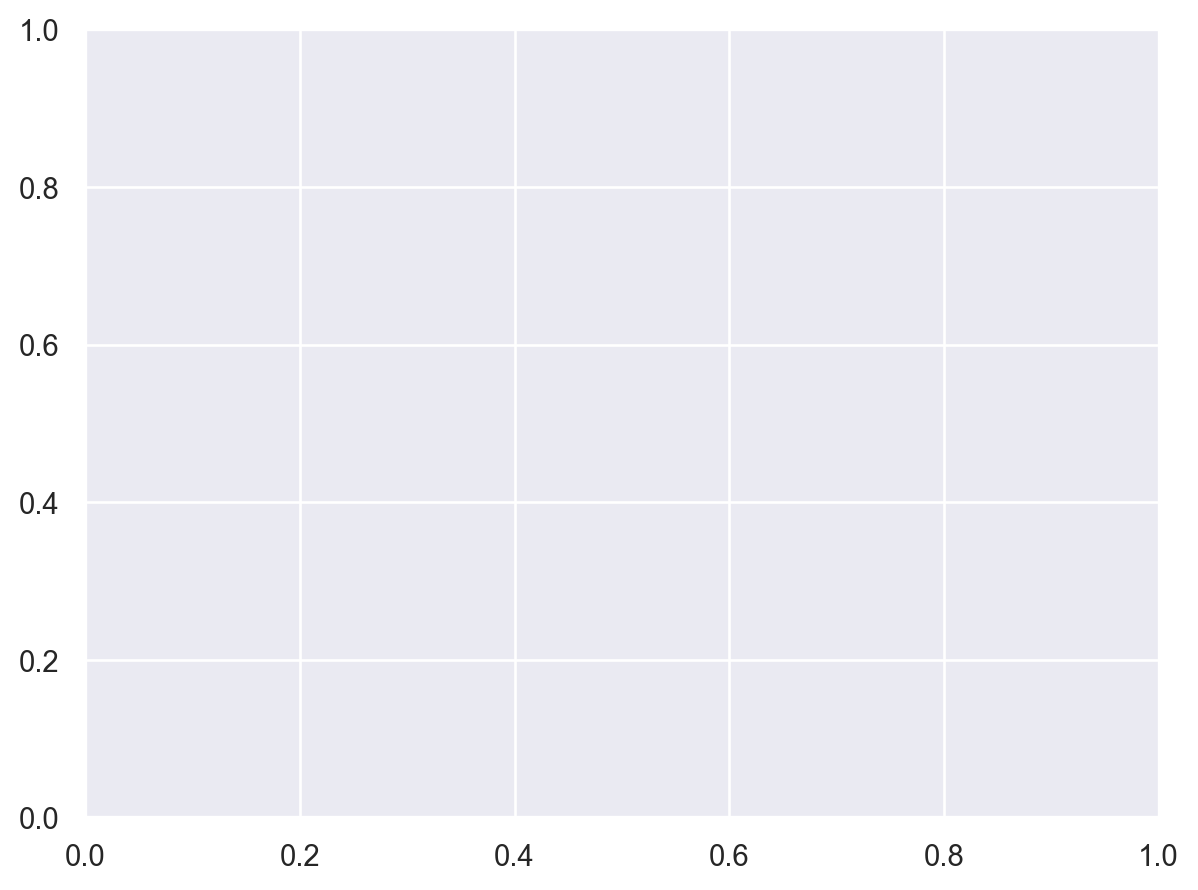

In [657]:
so.Plot(data=bloopdd, )

In [658]:
dt_obs

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
248  398           nodrift    1  543    688  0.787189  0.789244
249  398           nodrift    2  114    144  0.787200  0.791667
250  398           nodrift    3   84    109  0.787000  0.770642
88   399        converging    1   39    597  0.065920  0.065327
89   399        converging    2  190    564  0.337200  0.336879

[2210 rows x 7 columns]

In [659]:
dd["time_i_obs"].shape

(2210,)

In [660]:
dd["fly_i_obs"].shape

(2210,)

In [661]:
dd["n_obs"].shape

(2210,)

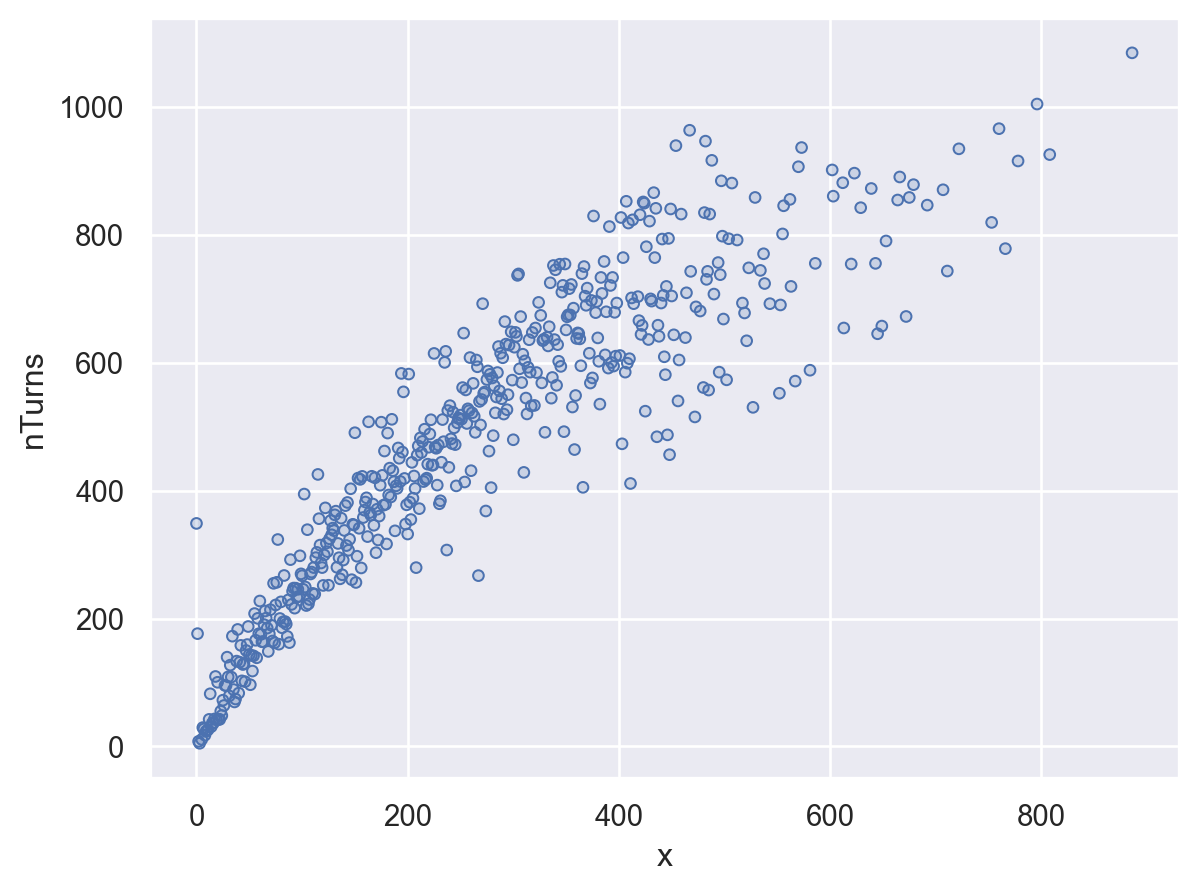

In [662]:
so.Plot(data=dt_obs, x="x", y="nTurns").add(so.Dots(), so.Agg())

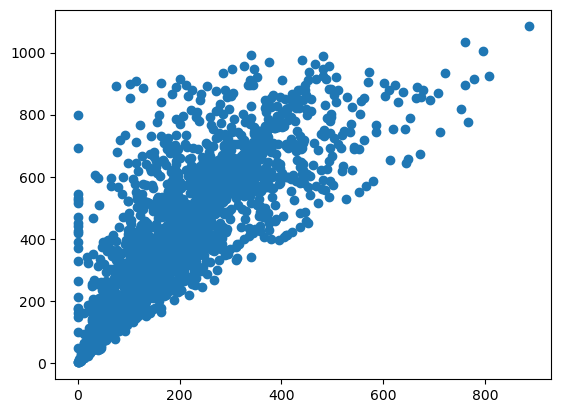

In [663]:
plt.scatter(dd["x_obs"], dd["n_obs"])

In [664]:
dd["s"].shape

(400,)

<Axes: >

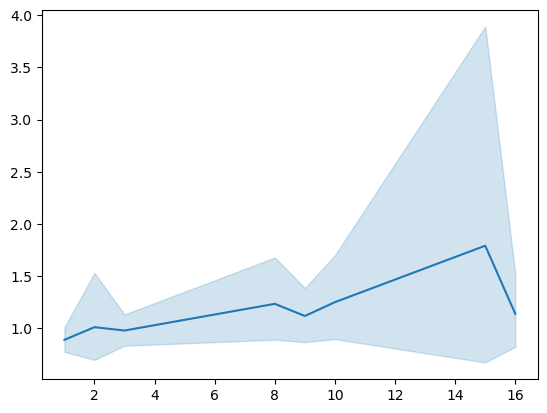

In [665]:
sns.lineplot(x=dd["time_i_obs"], y=dd["fly_i_obs"]/dd["n_obs"])

In [666]:
alltoydata

uID             PopID  Day    x nTurns     rbias    rguess
0      0  constantvariance    1  212    621  0.344359  0.341385
1      0  constantvariance    2   30    207  0.093000  0.144928
2      0  constantvariance    3  107    370  0.270800  0.289189
3      0  constantvariance    8  300    464  0.634600  0.646552
4      0  constantvariance    9  502    573  0.889900  0.876091
..   ...               ...  ...  ...    ...       ...       ...
795  326         expanding    8   13     21  0.405600  0.619048
796  326         expanding    9  177    407  0.428500  0.434889
797  326         expanding   10  276    596  0.463900  0.463087
798  326         expanding   15  117    256  0.430100  0.457031
799  326         expanding   16  107    283  0.394800  0.378092

[3200 rows x 7 columns]

In [ ]:
# del dgrp_data_toy_m6a

# dgrp_data_ser_m6={
#   "N": alltoydata["uID"].unique().shape[0], # skt.shape[0], #Total number of flies
#   "S": alltoydata["PopID"].unique().shape[0], #Total number of Lines
  
#   "T": int(alltoydata["Day"].max()+1), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
#   "s": pd.Categorical(serall_u["Drug Treatment"]).codes+1, # list of line number per fly
#   "fly_i_obs": serall_obs["uID"]+1, # indexes of fly number for flattened observations
#   "time_i_obs": np.array(serall_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
#   "t_obs": serall_obs['nTurns'].shape[0], # total number of observed trials
#   "x_obs": np.array(serall_obs['x'], dtype=int), # flattened array with number of right turns for each obs
#   "n_obs": np.array(serall_obs['nTurns']+1, dtype=int), # flattened array with number of total turns for each obs
#   "fly_i_mis": np.array(serall_mis["uID"], dtype=int)+1, # indexes of fly number for flattened observations
#   "time_i_mis": np.array(serall_mis["Day"], dtype=int)+1, # indexes of day number for flattened observations
#   "t_mis": serall_mis['nTurns'].shape[0] # total number of observed trials
#   # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
#   # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
# }


In [ ]:
dd

{'N': 400,
 'S': 4,
 'T': 17,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [668]:
bloop=pd.DataFrame([datadict["x_obs"], datadict["n_obs"], datadict["fly_i_obs"], datadict["time_i_obs"]], index=["x_obs", "n_obs", "fly_i_obs", "time_i_obs"]).T
bloop

x_obs  n_obs  fly_i_obs  time_i_obs
0       212    622          1           1
1        30    208          1           2
2       107    371          1           3
3       300    465          1           8
4       502    574          1           9
...     ...    ...        ...         ...
2205    543    689        399           1
2206    114    145        399           2
2207     84    110        399           3
2208     39    598        400           1
2209    190    565        400           2

[2210 rows x 4 columns]

In [ ]:
bloop.pivot(id)

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_53208/2164626870.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  bloop.pivot(id)


TypeError: pivot() missing 1 required argument: 'columns'

In [ ]:
bloop.pivot(id,columns="time_i_obs")

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_53208/263006531.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  bloop.pivot(id,columns="time_i_obs")


KeyError: 'None of [<built-in function id>] are in the columns'

In [ ]:
bloopmelt=bloop.melt(id_vars=["fly_i_obs","time_i_obs"])
bloopmelt

fly_i_obs  time_i_obs variable  value
0             1           1    x_obs     57
1             2           1    x_obs    171
2             2           2    x_obs     21
3             2           3    x_obs    101
4             2           8    x_obs    376
...         ...         ...      ...    ...
4169        400           8    n_obs    138
4170        400           9    n_obs    566
4171        400          10    n_obs    336
4172        400          15    n_obs    431
4173        400          16    n_obs    590

[4174 rows x 4 columns]

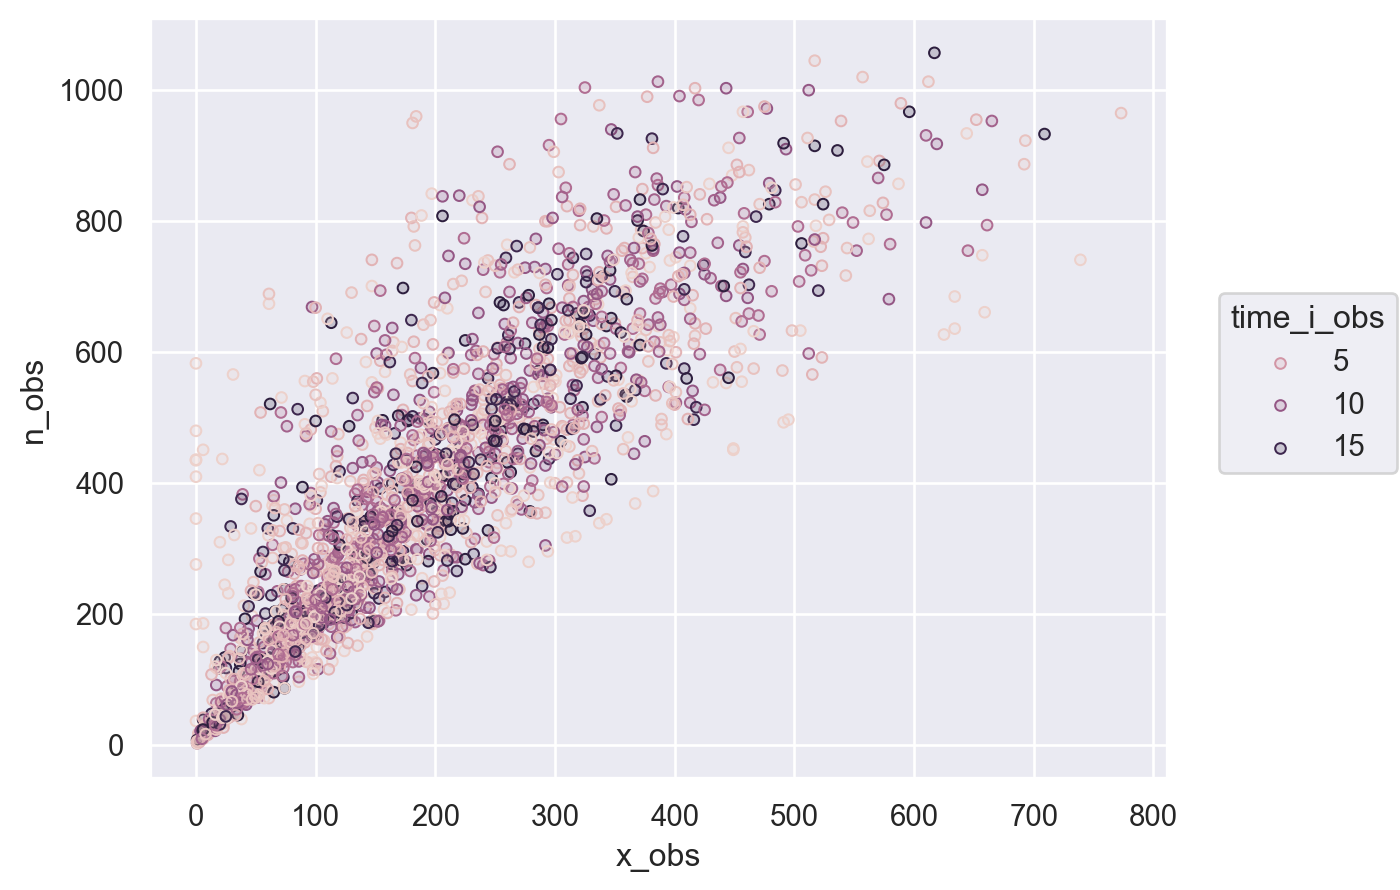

In [ ]:
so.Plot(data=bloop, x="x_obs", y="n_obs", group="fly_i_obs", color="time_i_obs").add(so.Dots())

In [ ]:
datadict

{'N': 400,
 'S': 4,
 'T': 17,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [ ]:
# testtable

In [831]:
modelname="dmodel6_bounding_scaled_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"
# stan_file="dgrp_model_test.stan"
model3 = CmdStanModel(stan_file=stan_file)

12:30:25 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed
12:30:34 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_bounding_scaled_transformed


Nan in Day 1


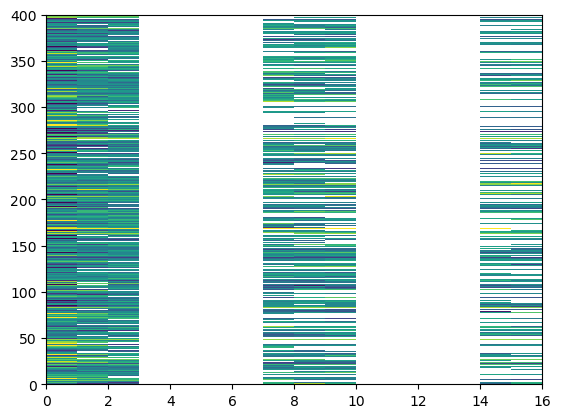

In [763]:
imp.reload(sh)
R=sh.teststandata(dd)
plt.pcolormesh(R)

In [751]:
dde=dd
dde

{'N': 400,
 'S': 4,
 'T': 16,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [752]:
dde["T"]=16

In [753]:
dde

{'N': 400,
 'S': 4,
 'T': 16,
 's': array([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2, 3,
        4, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 2, 3, 4, 1, 2,
        3, 4, 2, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 4, 1, 2,
   

In [832]:
fit3 = model3.sample(data=dd,
#  show_console=True,
  iter_sampling=1000)

12:30:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:41:10 - cmdstanpy - INFO - CmdStan done processing.
12:41:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpyl55ko3f/tmpamd1dzpj.stan', line 74, column 8 to column 35)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpyl55ko3f/tmpamd1dzpj.stan', line 78, column 10 to column 44)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpyl55ko3f/tmpamd1dzpj.stan', line 78, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpyl55ko3f/tmpamd1dzpj.stan', line 78, column 10 to column 44)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpyl55ko3f

12:41:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 iterations at max treedepth (0.4%)
	Chain 2 had 46 iterations at max treedepth (4.6%)
	Chain 3 had 5 iterations at max treedepth (0.5%)
	Use function "diagnose()" to see further information.


In [833]:
print(fit3.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_bounding_scaled_transformedgvols8pk/dmodel6_bounding_scaled_transformed-20230501123049_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_bounding_scaled_transformedgvols8pk/dmodel6_bounding_scaled_transformed-20230501123049_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_bounding_scaled_transformedgvols8pk/dmodel6_bounding_scaled_transformed-20230501123049_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_bounding_scaled_transformedgvols8pk/dmodel6_bounding_scaled_transformed-20230501123049_4.csv

Checking sampler transitions treedepth.
55 of 4000 (1.38%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No 

In [834]:
fit3.B.shape

(4000, 4)

In [835]:
fit3pd=fit3.draws_pd()
fit3pd

lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -552801.0       0.716770    0.027772          8.0         255.0   
1    -552699.0       0.957239    0.027772          7.0         127.0   
2    -552740.0       0.712905    0.027772          7.0         127.0   
3    -552799.0       0.790231    0.027772          7.0         127.0   
4    -552823.0       0.826730    0.027772          7.0         127.0   
...        ...            ...         ...          ...           ...   
3995 -552751.0       0.906885    0.023921          8.0         511.0   
3996 -552755.0       0.912548    0.023921          9.0         511.0   
3997 -552648.0       0.943498    0.023921          9.0         511.0   
3998 -552602.0       0.952400    0.023921          9.0         511.0   
3999 -552561.0       0.721018    0.023921          9.0         511.0   

      divergent__  energy__  R_obs[1]  R_obs[2]  R_obs[3]  ...  R[391,16]  \
0             0.0  557571.0  0.332485  0.132924  0.259434  ...   0.493603   
1             0.0  557553.0  0.322558  0.137482  0.278857  ...   0.476133   
2             0.0  557488.0  0.340465  0.164017  0.302141  ...   0.651654   
3             0.0  557577.0  0.355440  0.117594  0.274224  ...   0.621736   
4             0.0  557602.0  0.320340  0.163337  0.331092  ...   0.442394   
...           ...       ...       ...       ...       ...  ...        ...   
3995          0.0  557505.0  0.332742  0.118846  0.311625  ...   0.106473   
3996          0.0  557540.0  0.322917  0.131274  0.335515  ...   0.383491   
3997          0.0  557553.0  0.327170  0.139463  0.345854  ...   0.207848   
3998          0.0  557371.0  0.331733  0.145735  0.339157  ...   0.183576   
3999          0.0  557448.0  0.366177  0.154647  0.247980  ...   0.329629   

      R[392,16]  R[393,16]  R[394,16]  R[395,16]  R[396,16]  R[397,16]  \
0      0.226946   0.578327   0.174465   0.752588   0.300443   0.711920   
1      0.252666   0.355536   0.325335   0.664587   0.232818   0.459114   
2      0.200810   0.680459   0.520805   0.774219   0.504322   0.372747   
3      0.245852   0.667119   0.450665   0.739215   0.155618   0.485685   
4      0.379213   0.400655   0.688194   0.882556   0.104389   0.570734   
...         ...        ...        ...        ...        ...        ...   
3995   0.273315   0.733377   0.523656   0.309369   0.603908   0.269019   
3996   0.433930   0.442213   0.778646   0.248731   0.341811   0.567518   
3997   0.338423   0.512638   0.791045   0.183613   0.273127   0.568164   
3998   0.640615   0.615137   0.332962   0.744890   0.546328   0.262017   
3999   0.455267   0.277157   0.802975   0.641709   0.317242   0.824340   

      R[398,16]  R[399,16]  R[400,16]  
0      0.711903   0.405310   0.366831  
1      0.818364   0.587878   0.515372  
2      0.389512   0.526275   0.132255  
3      0.413583   0.529648   0.503083  
4      0.462903   0.370001   0.367691  
...         ...        ...        ...  
3995   0.451605   0.911786   0.404064  
3996   0.149160   0.589858   0.631274  
3997   0.310155   0.760097   0.540424  
3998   0.463440   0.587175   0.623801  
3999   0.872988   0.672503   0.392025  

[4000 rows x 16019 columns]

In [874]:
fit3pd.loc[:,"R_obs[1]":"R_obs[2210]"].mean(axis=0).std()

0.16842875499276447

<Axes: ylabel='Count'>

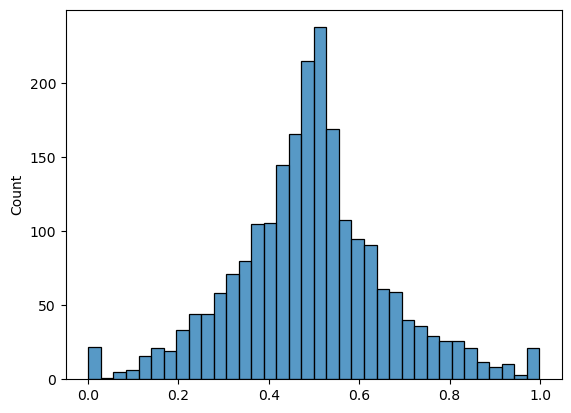

In [873]:
sns.histplot(fit3pd.loc[:,"R_obs[1]":"R_obs[2210]"].mean(axis=0))

In [836]:
fit3pd.loc[:,"R[1,1]":].mean(axis=0).index

Index(['R[1,1]', 'R[2,1]', 'R[3,1]', 'R[4,1]', 'R[5,1]', 'R[6,1]', 'R[7,1]',
       'R[8,1]', 'R[9,1]', 'R[10,1]',
       ...
       'R[391,16]', 'R[392,16]', 'R[393,16]', 'R[394,16]', 'R[395,16]',
       'R[396,16]', 'R[397,16]', 'R[398,16]', 'R[399,16]', 'R[400,16]'],
      dtype='object', length=6400)

In [837]:
fit3pd.loc[:,"R[1,1]":].mean(axis=0)

R[1,1]       0.498931
R[2,1]       0.500114
R[3,1]       0.499953
R[4,1]       0.497922
R[5,1]       0.501947
               ...   
R[396,16]    0.489558
R[397,16]    0.496590
R[398,16]    0.502586
R[399,16]    0.495699
R[400,16]    0.498607
Length: 6400, dtype: float64

In [838]:
fit3pd.loc[:,"R[1,1]":].T

0         1         2         3         4         5     \
R[1,1]     0.594166  0.645288  0.681157  0.553377  0.712969  0.720834   
R[2,1]     0.499168  0.599705  0.551860  0.532907  0.641965  0.524630   
R[3,1]     0.581899  0.648718  0.257727  0.378416  0.503431  0.359550   
R[4,1]     0.466172  0.620698  0.392765  0.531667  0.502930  0.415222   
R[5,1]     0.402912  0.349143  0.470395  0.442426  0.348995  0.502405   
...             ...       ...       ...       ...       ...       ...   
R[396,16]  0.300443  0.232818  0.504322  0.155618  0.104389  0.274629   
R[397,16]  0.711920  0.459114  0.372747  0.485685  0.570734  0.426284   
R[398,16]  0.711903  0.818364  0.389512  0.413583  0.462903  0.237775   
R[399,16]  0.405310  0.587878  0.526275  0.529648  0.370001  0.437225   
R[400,16]  0.366831  0.515372  0.132255  0.503083  0.367691  0.440393   

               6         7         8         9     ...      3990      3991  \
R[1,1]     0.433606  0.586298  0.585914  0.420547  ...  0.515974  0.350960   
R[2,1]     0.552536  0.297241  0.466211  0.287246  ...  0.504865  0.659423   
R[3,1]     0.603226  0.452346  0.331307  0.500472  ...  0.433726  0.457375   
R[4,1]     0.651263  0.418398  0.470240  0.561825  ...  0.356356  0.802049   
R[5,1]     0.402820  0.707163  0.620465  0.429905  ...  0.584263  0.318462   
...             ...       ...       ...       ...  ...       ...       ...   
R[396,16]  0.421891  0.582135  0.561752  0.529793  ...  0.447966  0.575205   
R[397,16]  0.689397  0.559971  0.666842  0.572994  ...  0.361649  0.394581   
R[398,16]  0.273548  0.239368  0.250874  0.289986  ...  0.573368  0.671899   
R[399,16]  0.537410  0.267250  0.167937  0.367899  ...  0.697606  0.957255   
R[400,16]  0.150698  0.433535  0.456505  0.192974  ...  0.307556  0.594970   

               3992      3993      3994      3995      3996      3997  \
R[1,1]     0.529741  0.445076  0.339751  0.587234  0.516791  0.343366   
R[2,1]     0.381894  0.491646  0.620113  0.642536  0.491705  0.600673   
R[3,1]     0.577052  0.425491  0.465981  0.501803  0.584320  0.631793   
R[4,1]     0.738180  0.667598  0.162145  0.565271  0.388799  0.383241   
R[5,1]     0.521468  0.432418  0.230976  0.545539  0.373055  0.440834   
...             ...       ...       ...       ...       ...       ...   
R[396,16]  0.763465  0.120593  0.618341  0.603908  0.341811  0.273127   
R[397,16]  0.563452  0.555644  0.343347  0.269019  0.567518  0.568164   
R[398,16]  0.747489  0.550640  0.493921  0.451605  0.149160  0.310155   
R[399,16]  0.663473  0.901271  0.920042  0.911786  0.589858  0.760097   
R[400,16]  0.279031  0.311355  0.466622  0.404064  0.631274  0.540424   

               3998      3999  
R[1,1]     0.866232  0.438767  
R[2,1]     0.681646  0.272459  
R[3,1]     0.372101  0.561408  
R[4,1]     0.493888  0.518874  
R[5,1]     0.596039  0.452093  
...             ...       ...  
R[396,16]  0.546328  0.317242  
R[397,16]  0.262017  0.824340  
R[398,16]  0.463440  0.872988  
R[399,16]  0.587175  0.672503  
R[400,16]  0.623801  0.392025  

[6400 rows x 4000 columns]

In [839]:
labels=fit3pd.loc[:,"R[1,1]":].mean(axis=0).index.str.extract(r'R\[(.*)\,([0-9].*)]')
labels.columns=["Fly", "Day"]
allflies=fit3pd.loc[:,"R[1,1]":].T
labels

Fly Day
0       1   1
1       2   1
2       3   1
3       4   1
4       5   1
...   ...  ..
6395  396  16
6396  397  16
6397  398  16
6398  399  16
6399  400  16

[6400 rows x 2 columns]

In [840]:
pd.MultiIndex.from_frame(labels)

MultiIndex([(  '1',  '1'),
            (  '2',  '1'),
            (  '3',  '1'),
            (  '4',  '1'),
            (  '5',  '1'),
            (  '6',  '1'),
            (  '7',  '1'),
            (  '8',  '1'),
            (  '9',  '1'),
            ( '10',  '1'),
            ...
            ('391', '16'),
            ('392', '16'),
            ('393', '16'),
            ('394', '16'),
            ('395', '16'),
            ('396', '16'),
            ('397', '16'),
            ('398', '16'),
            ('399', '16'),
            ('400', '16')],
           names=['Fly', 'Day'], length=6400)

In [841]:

allflies.index=pd.MultiIndex.from_frame(labels)
labels["Mean R"]=fit3pd.loc[:,"R[1,1]":].mean(axis=0).values
labels

Fly Day    Mean R
0       1   1  0.498931
1       2   1  0.500114
2       3   1  0.499953
3       4   1  0.497922
4       5   1  0.501947
...   ...  ..       ...
6395  396  16  0.489558
6396  397  16  0.496590
6397  398  16  0.502586
6398  399  16  0.495699
6399  400  16  0.498607

[6400 rows x 3 columns]

In [842]:
allflies

0         1         2         3         4         5         6     \
Fly Day                                                                         
1   1    0.594166  0.645288  0.681157  0.553377  0.712969  0.720834  0.433606   
2   1    0.499168  0.599705  0.551860  0.532907  0.641965  0.524630  0.552536   
3   1    0.581899  0.648718  0.257727  0.378416  0.503431  0.359550  0.603226   
4   1    0.466172  0.620698  0.392765  0.531667  0.502930  0.415222  0.651263   
5   1    0.402912  0.349143  0.470395  0.442426  0.348995  0.502405  0.402820   
...           ...       ...       ...       ...       ...       ...       ...   
396 16   0.300443  0.232818  0.504322  0.155618  0.104389  0.274629  0.421891   
397 16   0.711920  0.459114  0.372747  0.485685  0.570734  0.426284  0.689397   
398 16   0.711903  0.818364  0.389512  0.413583  0.462903  0.237775  0.273548   
399 16   0.405310  0.587878  0.526275  0.529648  0.370001  0.437225  0.537410   
400 16   0.366831  0.515372  0.132255  0.503083  0.367691  0.440393  0.150698   

             7         8         9     ...      3990      3991      3992  \
Fly Day                                ...                                 
1   1    0.586298  0.585914  0.420547  ...  0.515974  0.350960  0.529741   
2   1    0.297241  0.466211  0.287246  ...  0.504865  0.659423  0.381894   
3   1    0.452346  0.331307  0.500472  ...  0.433726  0.457375  0.577052   
4   1    0.418398  0.470240  0.561825  ...  0.356356  0.802049  0.738180   
5   1    0.707163  0.620465  0.429905  ...  0.584263  0.318462  0.521468   
...           ...       ...       ...  ...       ...       ...       ...   
396 16   0.582135  0.561752  0.529793  ...  0.447966  0.575205  0.763465   
397 16   0.559971  0.666842  0.572994  ...  0.361649  0.394581  0.563452   
398 16   0.239368  0.250874  0.289986  ...  0.573368  0.671899  0.747489   
399 16   0.267250  0.167937  0.367899  ...  0.697606  0.957255  0.663473   
400 16   0.433535  0.456505  0.192974  ...  0.307556  0.594970  0.279031   

             3993      3994      3995      3996      3997      3998      3999  
Fly Day                                                                        
1   1    0.445076  0.339751  0.587234  0.516791  0.343366  0.866232  0.438767  
2   1    0.491646  0.620113  0.642536  0.491705  0.600673  0.681646  0.272459  
3   1    0.425491  0.465981  0.501803  0.584320  0.631793  0.372101  0.561408  
4   1    0.667598  0.162145  0.565271  0.388799  0.383241  0.493888  0.518874  
5   1    0.432418  0.230976  0.545539  0.373055  0.440834  0.596039  0.452093  
...           ...       ...       ...       ...       ...       ...       ...  
396 16   0.120593  0.618341  0.603908  0.341811  0.273127  0.546328  0.317242  
397 16   0.555644  0.343347  0.269019  0.567518  0.568164  0.262017  0.824340  
398 16   0.550640  0.493921  0.451605  0.149160  0.310155  0.463440  0.872988  
399 16   0.901271  0.920042  0.911786  0.589858  0.760097  0.587175  0.672503  
400 16   0.311355  0.466622  0.404064  0.631274  0.540424  0.623801  0.392025  

[6400 rows x 4000 columns]

In [843]:
flys=pd.DataFrame(dd["s"], index=pd.Index(np.arange(1,401), name="Fly"), columns=["strain"])
flys


strain
Fly        
1         1
2         1
3         2
4         3
5         4
..      ...
396       1
397       2
398       3
399       4
400       2

[400 rows x 1 columns]

In [845]:

# ddfsm=pd.merge(dddf, flys, on="fly_i_obs")
# ddfsm

In [846]:
afm=allflies.melt(ignore_index=False).reset_index()
afm["Fly"]=pd.Series(afm["Fly"], dtype=int)

In [847]:
afm["Fly"]

0             1
1             2
2             3
3             4
4             5
           ... 
25599995    396
25599996    397
25599997    398
25599998    399
25599999    400
Name: Fly, Length: 25600000, dtype: int64

In [848]:
dd["time_i_obs"]

array([1, 2, 3, ..., 3, 1, 2])

In [849]:
afm=pd.merge(afm, flys, on="Fly")


In [850]:
afm["strain"]=pd.Categorical(afm["strain"])

In [851]:
afm["strain"]

0           1
1           1
2           1
3           1
4           1
           ..
25599995    2
25599996    2
25599997    2
25599998    2
25599999    2
Name: strain, Length: 25600000, dtype: category
Categories (4, int64): [1, 2, 3, 4]

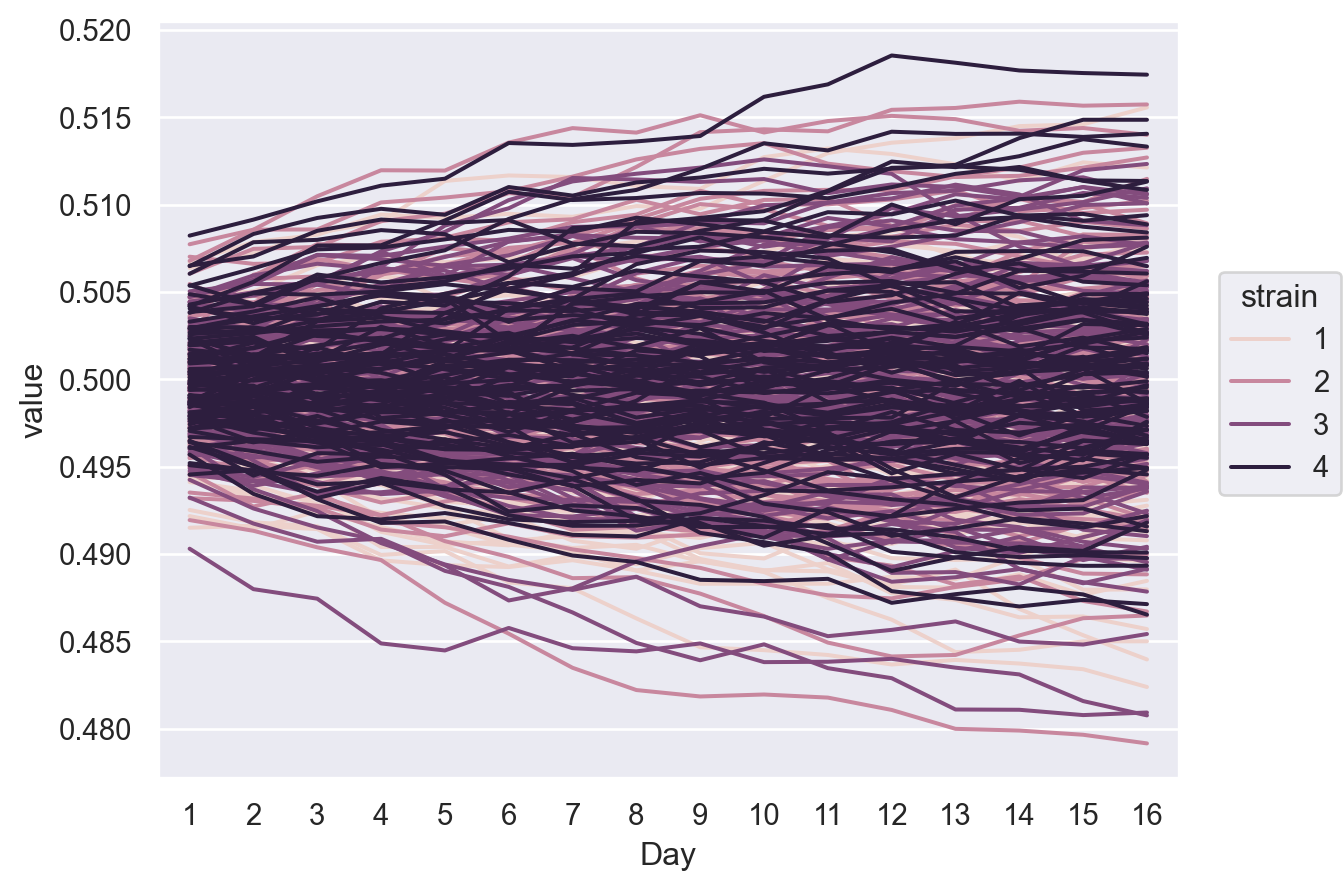

In [852]:
so.Plot(data=afm, x="Day", y="value", color="strain", group="Fly").add(so.Line(), so.Agg())

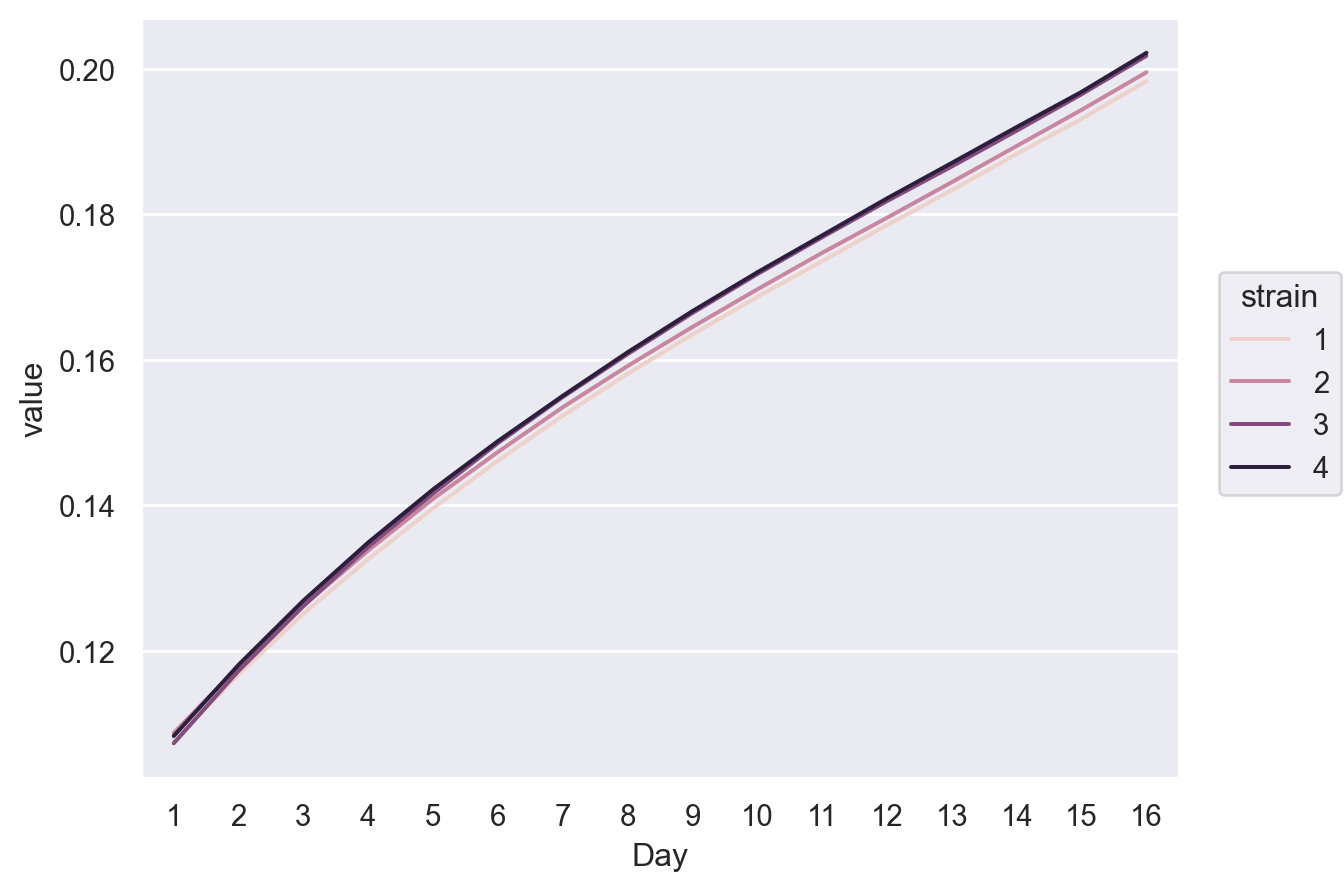

In [859]:
so.Plot(data=afm, x="Day", y="value", color="strain").add(so.Line(), so.Agg(np.std))

In [853]:
pd.concat([fit3pd.loc[:,"R[1,1]":].mean(axis=0),fit3pd.loc[:,"R[1,1]":]aa.mean(axis=0).index.str.extract(r'R\[(.*)\,([0-9].*)]')]a, axis=1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2610943040.py, line 1)

In [854]:
alltoydata["PopID"].unique()

array(['constantvariance', 'nodrift', 'converging', 'expanding'],
      dtype=object)

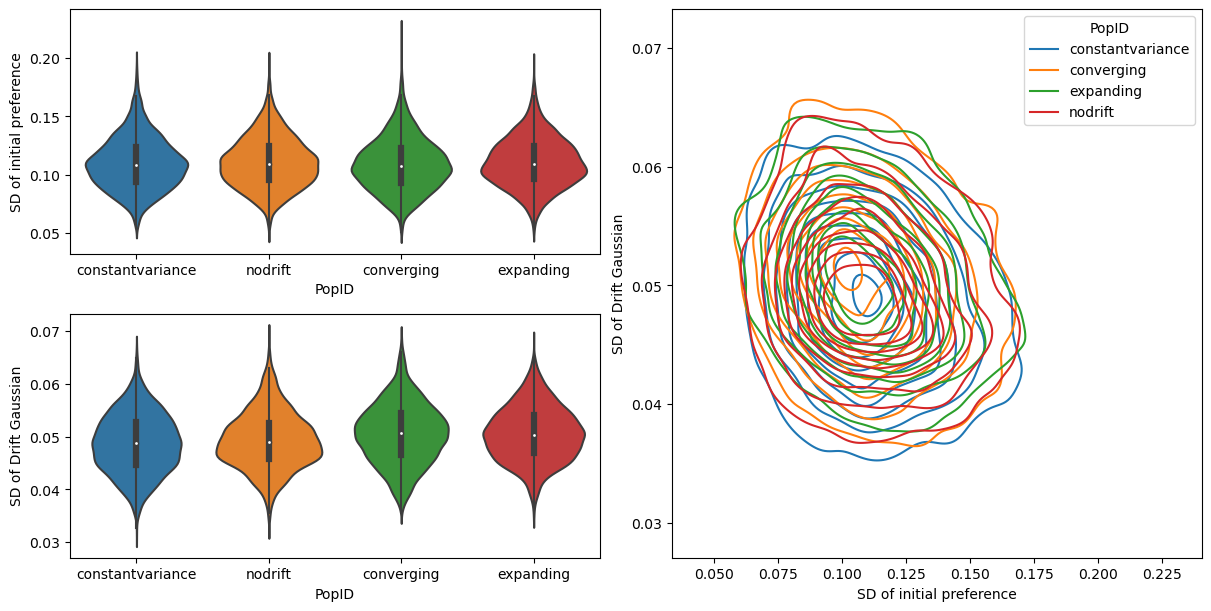

In [855]:
imp.reload(sh)
a,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", check=False)


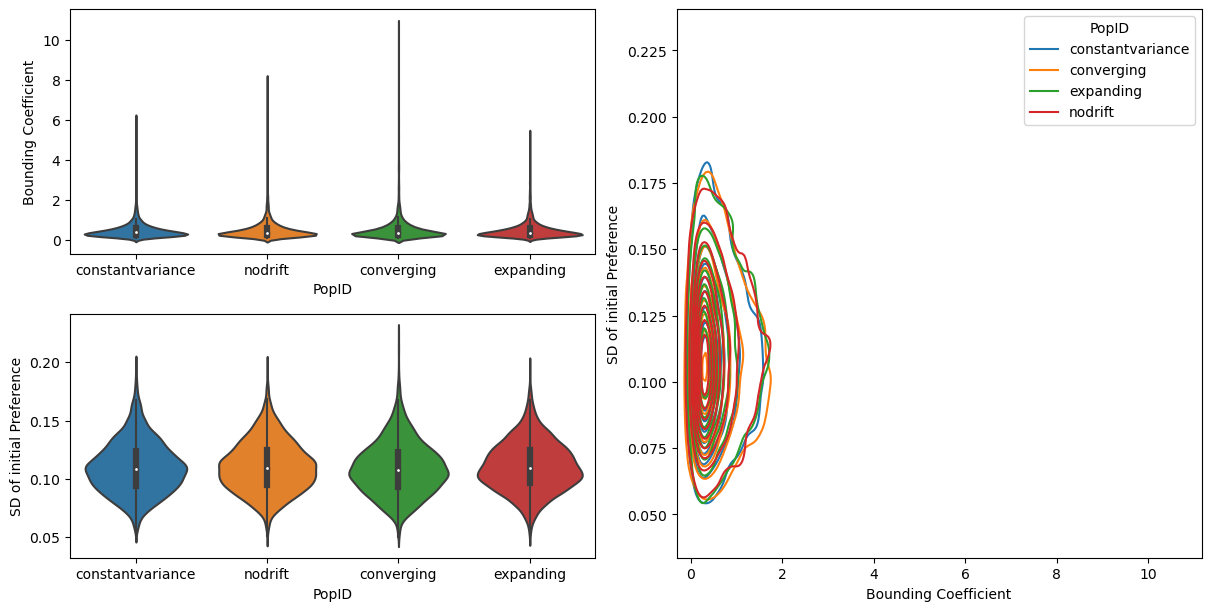

In [856]:
c,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", var1="BH", var2="B", Des1="SD of initial Preference", Des2="Bounding Coefficient", check=False)


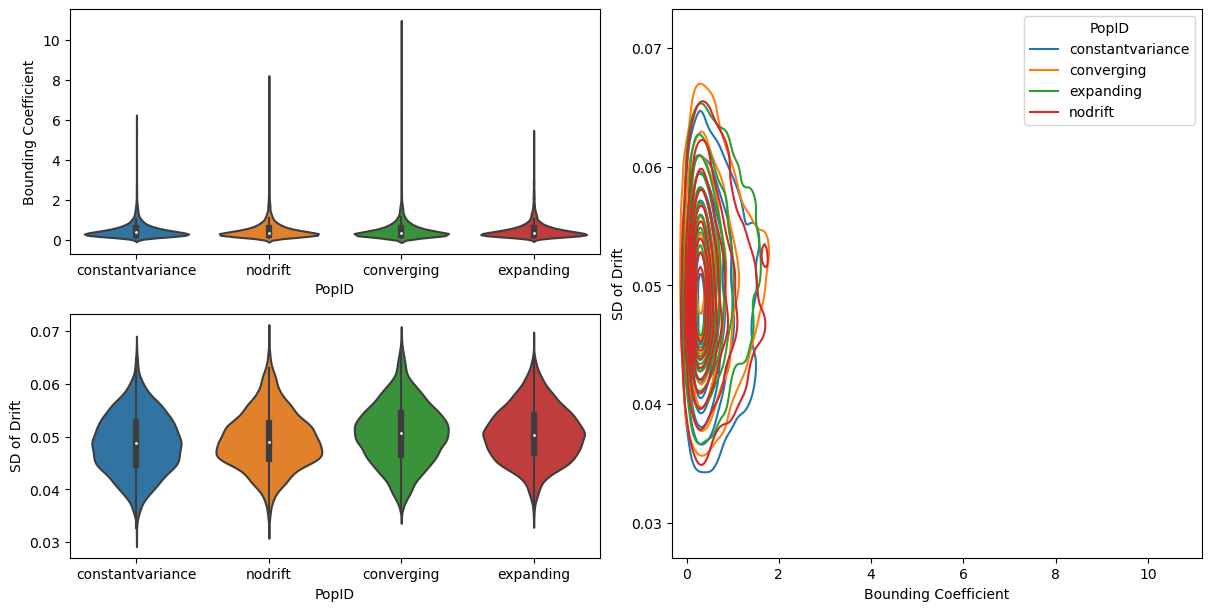

In [857]:
c,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", var1="D", var2="B", Des1="SD of Drift", Des2="Bounding Coefficient", check=False)


# AR(1) Model

In [877]:
modelname="dmodel6_AR_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"

model_AR = CmdStanModel(stan_file=stan_file)


13:33:19 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed
13:33:28 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed


In [878]:

# stan_file=modelname+".stan"
# # stan_file="dgrp_model_test.stan"


# model_AR = CmdStanModel(stan_file=stan_file)
fit_AR = model_AR.sample(data=dd,
#  show_console=True,
  iter_sampling=1000)

13:33:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:35:15 - cmdstanpy - INFO - CmdStan done processing.
13:35:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8cojid3u/tmpcz3_fqsh.stan', line 73, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8cojid3u/tmpcz3_fqsh.stan', line 77, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8cojid3u/tmpcz3_fqsh.stan', line 73, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8cojid3u/tmpcz3_fqsh.stan', line 77, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8cojid3u/t

13:35:17 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 divergent transitions (100.0%)
	Chain 2 had 1000 divergent transitions (100.0%)
	Chain 3 had 1000 divergent transitions (100.0%)
	Chain 4 had 1000 divergent transitions (100.0%)
	Use function "diagnose()" to see further information.


In [879]:
print(fit_AR.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_AR_transformedggdtm07o/dmodel6_AR_transformed-20230501133333_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_AR_transformedggdtm07o/dmodel6_AR_transformed-20230501133333_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_AR_transformedggdtm07o/dmodel6_AR_transformed-20230501133333_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmppg3pkhhz/dmodel6_AR_transformedggdtm07o/dmodel6_AR_transformed-20230501133333_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
4000 of 4000 (100.00%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - samp

In [883]:
fit_ARs=fit_AR.summary()
fit_ARs

Mean        MCSE      StdDev             5%  \
lp__      -555445.000000  493.394000  704.972000 -556421.000000   
R_obs[1]       -0.645501    0.038230    0.108514      -0.801810   
R_obs[2]       -1.816970    0.080081    0.188587      -2.096290   
R_obs[3]       -0.897417    0.040153    0.135024      -1.093250   
R_obs[4]        0.646474    0.048067    0.100265       0.463192   
...                  ...         ...         ...            ...   
R[400,12]       0.231678    0.287737    0.935667      -1.089430   
R[400,13]       0.109593    0.171776    0.984852      -1.566750   
R[400,14]       0.450985    0.386193    0.815255      -0.907081   
R[400,15]       0.041612    0.404396    1.075300      -1.904300   
R[400,16]      -0.044271    0.365029    1.105480      -1.745980   

                     50%            95%     N_Eff   N_Eff/s    R_hat  
lp__      -555103.000000 -554635.000000   2.04153  0.032566  8.59895  
R_obs[1]       -0.652691      -0.438795   8.05679  0.128520  1.50912  
R_obs[2]       -1.827910      -1.501180   5.54583  0.088466  1.31081  
R_obs[3]       -0.903862      -0.655622  11.30780  0.180379  1.28635  
R_obs[4]        0.643936       0.819106   4.35121  0.069409  1.63234  
...                  ...            ...       ...       ...      ...  
R[400,12]       0.031914       2.092540  10.57430  0.168679  1.52561  
R[400,13]       0.154143       1.576800  32.87130  0.524355  1.07294  
R[400,14]       0.521023       1.603100   4.45632  0.071086  1.47169  
R[400,15]       0.093773       1.645880   7.07042  0.112786  1.51196  
R[400,16]      -0.099785       1.769560   9.17167  0.146304  1.28478  

[16013 rows x 9 columns]

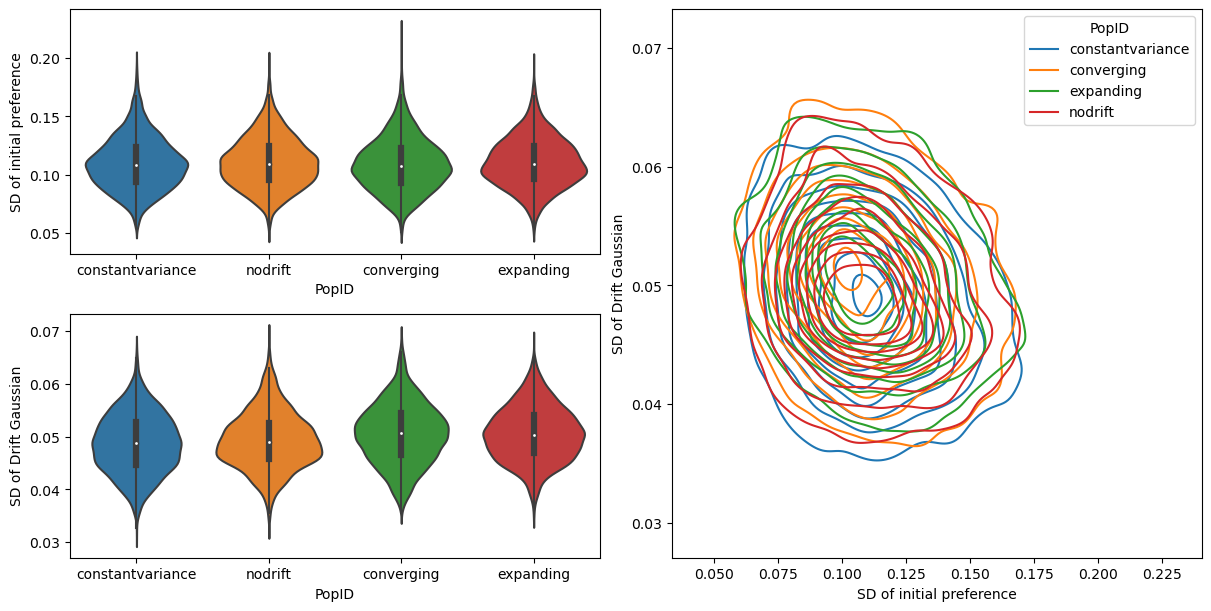

In [880]:
imp.reload(sh)
a,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", check=False)


In [884]:
alltoydata["PopID"].unique()

array(['constantvariance', 'nodrift', 'converging', 'expanding'],
      dtype=object)

KeyError: 'PHI[1]'

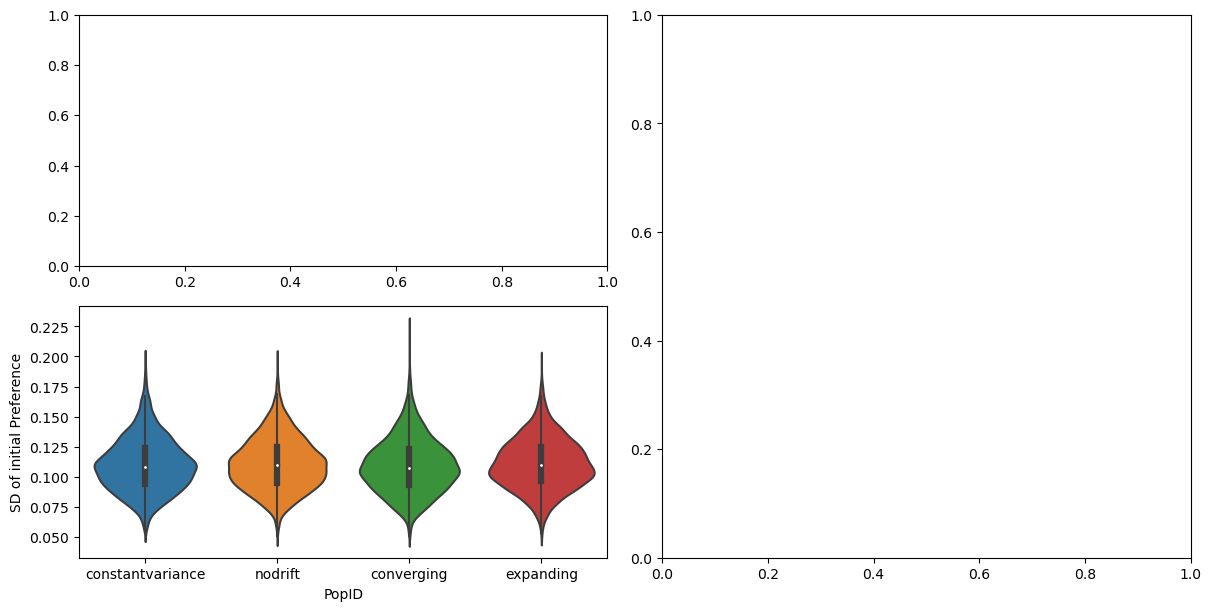

In [882]:

c,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", var1="BH", var2="PHI", Des1="SD of initial Preference", Des2="Bounding Coefficient", check=False)


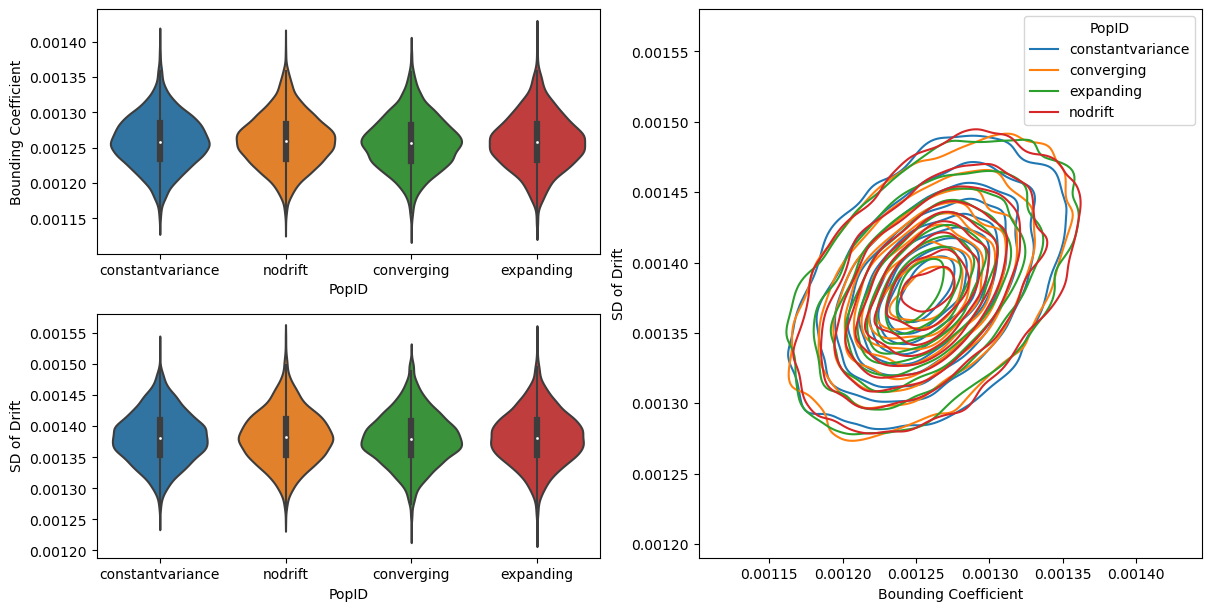

In [ ]:

c,b=sh.plotResults(fit3, alltoydata["PopID"].unique(), poplabel="PopID", var1="D", var2="B", Des1="SD of Drift", Des2="Bounding Coefficient", check=False)


In [876]:
f3s=fit3.summary()
f3s

Mean       MCSE      StdDev             5%            50%  \
lp__      -552699.000000  51.369200  343.695000 -553218.000000 -552717.000000   
R_obs[1]        0.341589   0.000274    0.019448       0.309683       0.341281   
R_obs[2]        0.148139   0.000331    0.024201       0.109170       0.147160   
R_obs[3]        0.290885   0.000344    0.023402       0.252958       0.290492   
R_obs[4]        0.645678   0.000325    0.021629       0.610076       0.646157   
...                  ...        ...         ...            ...            ...   
R[400,12]       0.499435   0.007281    0.183251       0.199104       0.498303   
R[400,13]       0.499519   0.007330    0.187020       0.187204       0.500008   
R[400,14]       0.498316   0.007451    0.192566       0.179323       0.498968   
R[400,15]       0.497068   0.007331    0.196586       0.167086       0.497370   
R[400,16]       0.498607   0.007448    0.200463       0.161500       0.500092   

                     95%      N_Eff   N_Eff/s     R_hat  
lp__      -552123.000000    44.7652  0.040140  1.093570  
R_obs[1]        0.373288  5054.1200  4.531950  0.999587  
R_obs[2]        0.189656  5349.8800  4.797150  0.999609  
R_obs[3]        0.331091  4640.2500  4.160840  0.999601  
R_obs[4]        0.680813  4435.8000  3.977520  0.999576  
...                  ...        ...       ...       ...  
R[400,12]       0.807370   633.5300  0.568076  1.008330  
R[400,13]       0.817177   651.0040  0.583745  1.008430  
R[400,14]       0.824547   667.8490  0.598850  1.008900  
R[400,15]       0.826604   718.9980  0.644714  1.007550  
R[400,16]       0.830749   724.3530  0.649516  1.007430  

[16013 rows x 9 columns]

In [ ]:
f3s.loc("Mean")